# Projeto de Analise de dados CENIPA 2010 a 2019
Este projeto é um estudo sobre as ocorrências registradas pela CENIPA de 2010 á 2019, tem enfoque qualitativo em cima dos dados fornecidos pela base.

* Importando as bibliotecas para o estudo geral

In [28]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import statistics as sts

* Lendo o dataframe e consultando as informações e tratando os dados.

In [29]:
df_CENIPA = pd.read_csv("https://raw.githubusercontent.com/SouzaAllan/ESTUDO_CENIPA_2010-2019/main/PROJETO%20V2/ocorrencias_cenipa.csv", sep=';', encoding='latin-1')

In [30]:
print('Colunas exixtentes no data frame :{}'.format(df_CENIPA.columns.values)) #valores das colunas

df_CENIPA.head()# 5 primeiras linhas


Colunas exixtentes no data frame :['codigo' 'tipo' 'descricao' 'cidade' 'estado' 'data' 'ano' 'hora'
 'aeronave_liberada' 'status_investigacao' 'aeronaves_envolvidas'
 'ocorrencia_saida_pista' 'aeronave_tipo' 'aeronave_fabricante'
 'motor_tipo' 'aeronave_motor_quantidade' 'aeronave_assentos'
 'aeronave_ano_fabricacao' 'aeronave_pais_fabricante'
 'aeronave_fase_operacao' 'aeronave_nivel_dano']


,codigo,tipo,descricao,cidade,estado,data,ano,hora,aeronave_liberada,status_investigacao,aeronaves_envolvidas,ocorrencia_saida_pista,aeronave_tipo,aeronave_fabricante,motor_tipo,aeronave_motor_quantidade,aeronave_assentos,aeronave_ano_fabricacao,aeronave_pais_fabricante,aeronave_fase_operacao,aeronave_nivel_dano
0,40107,ACIDENTE,COLISÃO COM OBSTÁCULO DURANTE A DECOLAGEM E POUSO,GURUPÁ,PA,12/01/2010,2010,14:30:00,SIM,FINALIZADA,1,NÃO,AVIÃO,NEIVA INDUSTRIA AERONAUTICA,PISTÃO,MONOMOTOR,7,1977,BRASIL,POUSO,LEVE
1,40147,ACIDENTE,FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPON...,UNIÃO DA VITÓRIA,PR,08/04/2010,2010,14:20:00,SIM,FINALIZADA,1,SIM,AVIÃO,PIPER AIRCRAFT,PISTÃO,BIMOTOR,6,1997,BRASIL,POUSO,SUBSTANCIAL
2,40148,ACIDENTE,PANE SECA,CAMPO GRANDE,MS,19/03/2010,2010,19:30:00,SIM,FINALIZADA,1,NÃO,AVIÃO,CESSNA AIRCRAFT,PISTÃO,MONOMOTOR,6,1962,BRASIL,APROXIMAÇÃO FINAL,SUBSTANCIAL
3,40149,ACIDENTE,FALHA DO MOTOR EM VOO,LUZIÂNIA,GO,21/03/2010,2010,20:45:00,SIM,FINALIZADA,1,NÃO,AVIÃO,XAVANTE,PISTÃO,MONOMOTOR,2,1974,BRASIL,DECOLAGEM,DESTRUÍDA
4,40150,INCIDENTE GRAVE,COM TREM DE POUSO,SANTA MARIA,RS,10/03/2010,2010,17:20:00,SIM,FINALIZADA,1,NÃO,AVIÃO,BEECH AIRCRAFT,PISTÃO,MONOMOTOR,6,1974,BRASIL,POUSO,LEVE


In [31]:
df_CENIPA['quantidade'] = 1 #criando uma coluna para deixar o groupby visual

In [32]:
df_CENIPA = df_CENIPA[df_CENIPA.aeronave_ano_fabricacao != 0] #removendo valores 0 
df_CENIPA = df_CENIPA[df_CENIPA.aeronave_assentos != 0]#removendo valores 0 
df_CENIPA = df_CENIPA[df_CENIPA.aeronave_ano_fabricacao < 3000]#removendo valores Maiores que 3000
df_CENIPA

,codigo,tipo,descricao,cidade,estado,data,ano,hora,aeronave_liberada,status_investigacao,aeronaves_envolvidas,ocorrencia_saida_pista,aeronave_tipo,aeronave_fabricante,motor_tipo,aeronave_motor_quantidade,aeronave_assentos,aeronave_ano_fabricacao,aeronave_pais_fabricante,aeronave_fase_operacao,aeronave_nivel_dano,quantidade
0,40107,ACIDENTE,COLISÃO COM OBSTÁCULO DURANTE A DECOLAGEM E POUSO,GURUPÁ,PA,12/01/2010,2010,14:30:00,SIM,FINALIZADA,1,NÃO,AVIÃO,NEIVA INDUSTRIA AERONAUTICA,PISTÃO,MONOMOTOR,7,1977,BRASIL,POUSO,LEVE,1
1,40147,ACIDENTE,FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPON...,UNIÃO DA VITÓRIA,PR,08/04/2010,2010,14:20:00,SIM,FINALIZADA,1,SIM,AVIÃO,PIPER AIRCRAFT,PISTÃO,BIMOTOR,6,1997,BRASIL,POUSO,SUBSTANCIAL,1
2,40148,ACIDENTE,PANE SECA,CAMPO GRANDE,MS,19/03/2010,2010,19:30:00,SIM,FINALIZADA,1,NÃO,AVIÃO,CESSNA AIRCRAFT,PISTÃO,MONOMOTOR,6,1962,BRASIL,APROXIMAÇÃO FINAL,SUBSTANCIAL,1
3,40149,ACIDENTE,FALHA DO MOTOR EM VOO,LUZIÂNIA,GO,21/03/2010,2010,20:45:00,SIM,FINALIZADA,1,NÃO,AVIÃO,XAVANTE,PISTÃO,MONOMOTOR,2,1974,BRASIL,DECOLAGEM,DESTRUÍDA,1
4,40150,INCIDENTE GRAVE,COM TREM DE POUSO,SANTA MARIA,RS,10/03/2010,2010,17:20:00,SIM,FINALIZADA,1,NÃO,AVIÃO,BEECH AIRCRAFT,PISTÃO,MONOMOTOR,6,1974,BRASIL,POUSO,LEVE,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5234,79104,ACIDENTE,INDETERMINADO,ELIAS FAUSTO,SP,17/11/2019,2019,15:45:00,SIM,FINALIZADA,1,NÃO,AVIÃO,INDETERMINADO,PISTÃO,MONOMOTOR,4,2009,BRASIL,INDETERMINADO,SUBSTANCIAL,1
5235,79105,ACIDENTE,INDETERMINADO,CAMPO DO TENENTE,PR,02/09/2019,2019,17:10:00,SIM,FINALIZADA,1,NÃO,AVIÃO,CESSNA AIRCRAFT,PISTÃO,MONOMOTOR,4,1963,BRASIL,POUSO,SUBSTANCIAL,1
5236,79106,ACIDENTE,OUTROS,RONDONÓPOLIS,MT,29/08/2019,2019,12:00:00,SIM,FINALIZADA,1,NÃO,AVIÃO,CESSNA AIRCRAFT,PISTÃO,MONOMOTOR,6,1971,BRASIL,POUSO,DESTRUÍDA,1
5240,79203,INCIDENTE,FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPON...,FLORIANÓPOLIS,SC,20/12/2019,2019,16:37:00,SIM,FINALIZADA,1,NÃO,AVIÃO,CESSNA AIRCRAFT,PISTÃO,MONOMOTOR,2,1980,BRASIL,CORRIDA APÓS POUSO,LEVE,1


## Analise de Dados como principal fonte coluna TIPO
* **Contém estudos estatisticos como média, moda e desvio padrão. Além de média de determinado tipo de ocorrência por estado, agrupamento de dados por estado e tipo de ocorrência. Por fim dois gráficos, um demonstrando os dados de tipo de ocorrência por estado, e outro o total de ocorrências dividio por tipo.** 

INCIDENTE          2649
ACIDENTE           1532
INCIDENTE GRAVE     625
Name: tipo, dtype: int64

A média por tipo de ocorrências é: 1602.0

A moda por tipo de ocorrências é: INCIDENTE

O desvio padrão por tipo de ocorrências é: 1013.8140855206145



O total de acidentes é de 1532

A média de acidentes é de 56.74074074074074 por estado



O total de incidentes é de 2649

A média de incidentes é de 98.11111111111111 por estado



O total de incidentes graves é de 625

A média de incidentes graves é de 23.15 por estado



TOP 10 Tipos de Ocorrências por Estado


,,quantidade
estado,tipo,
SP,INCIDENTE,684
RJ,INCIDENTE,334
SP,ACIDENTE,317
MG,INCIDENTE,261
PR,INCIDENTE,235
RS,ACIDENTE,152
MT,ACIDENTE,135
PR,ACIDENTE,127
AM,INCIDENTE,120


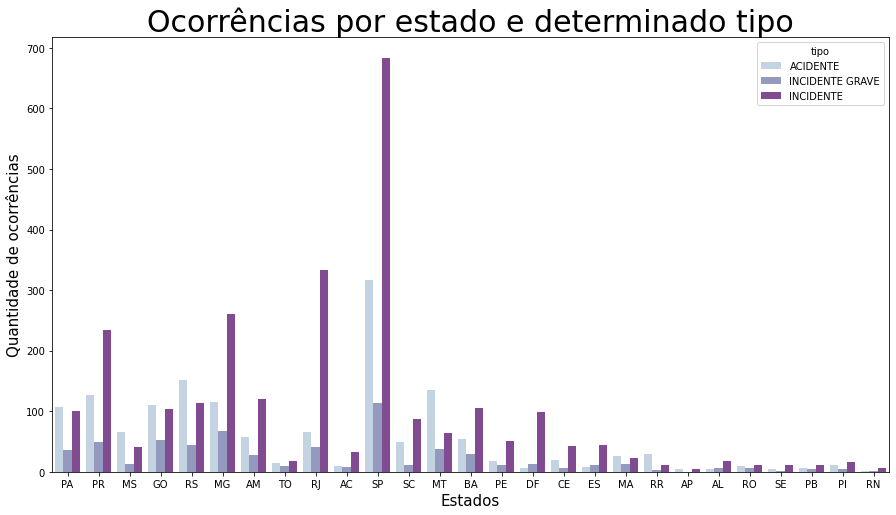

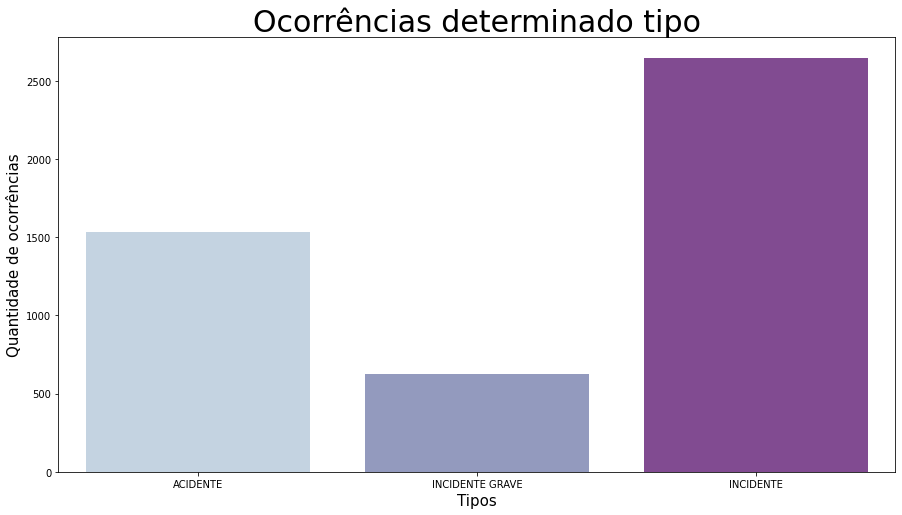

In [33]:
coluna_tipo = df_CENIPA['tipo']
incac_tipo = coluna_tipo.value_counts()

media_tipo = incac_tipo.mean()

moda_tipo = sts.mode(coluna_tipo)

desvio_tipo = sts.stdev(incac_tipo)


qtde_estados = df_CENIPA['estado'].value_counts()

acidentes = df_CENIPA[df_CENIPA['tipo'] == 'ACIDENTE']#FILTRANDO A VARIAVEL TIPO PARA ACIDENTES
qtde_acidentes = int(acidentes.shape[0])#SELECIONANDO O TOTAL DE ACIDENTES

media_acidentes = qtde_acidentes / qtde_estados.shape[0] #CALCULANDO A MÉDIA DE ACIDENTES POR ANO 


incidentes = df_CENIPA[df_CENIPA['tipo'] == 'INCIDENTE']#FILTRANDO A VARIAVEL TIPO PARA INCIDENTES
qtde_incidentes = int(incidentes.shape[0])

media_incidentes = qtde_incidentes / qtde_estados.shape[0]


incidentesGraves = df_CENIPA[df_CENIPA['tipo'] == 'INCIDENTE GRAVE']#FILTRANDO A VARIAVEL TIPO PARA INCIDENTES GRAVES
qtde_incidentesGraves = int(incidentesGraves.shape[0])

media_incidentesGraves = qtde_incidentesGraves / qtde_estados.shape[0]



plt.figure(figsize = (15,8))
sns.countplot(data = df_CENIPA, x ='estado', hue = 'tipo', palette = 'BuPu')

plt.xlabel('Estados', fontdict={'fontsize': 15})
plt.ylabel('Quantidade de ocorrências', fontdict={'fontsize': 15})

plt.title('Ocorrências por estado e determinado tipo', fontdict={'fontsize': 30})


plt.figure(figsize = (15,8))
sns.countplot(data = df_CENIPA, x ='tipo', palette = 'BuPu')

plt.xlabel('Tipos', fontdict={'fontsize': 15})
plt.ylabel('Quantidade de ocorrências', fontdict={'fontsize': 15})

plt.title('Ocorrências determinado tipo', fontdict={'fontsize': 30})

print(incac_tipo)
print('')
print('A média por tipo de ocorrências é: {}'.format(media_tipo))
print('')
print('A moda por tipo de ocorrências é: {}'.format(moda_tipo))
print('')
print('O desvio padrão por tipo de ocorrências é: {}'.format(desvio_tipo))
print('')
print('')
print('')
print('O total de acidentes é de {}'.format(qtde_acidentes))
print('')
print('A média de acidentes é de {} por estado'.format(media_acidentes))
print('')
print('')
print('')
print('O total de incidentes é de {}'.format(qtde_incidentes))
print('')
print('A média de incidentes é de {} por estado'.format(media_incidentes))
print('')
print('')
print('')
print('O total de incidentes graves é de {}'.format(qtde_incidentesGraves))
print('')
print('A média de incidentes graves é de {} por estado'.format(round(media_incidentesGraves, 2)))
print('')
print('')
print('')
print('TOP 10 Tipos de Ocorrências por Estado')
df_CENIPA.groupby(['estado', 'tipo']).agg({'quantidade':'count'}).sort_values(by='quantidade',  ascending = False).head(10)

* Ao total sao 4.806 ocorrencias com quedas de aviões em torno dos anos de 2010 ate 2019 no brasil, e São Paulo(SP) regiao de maior acontecimento de acidentes, incidentes, incidentes graves de acordo com a pesquisa do CENIPA. Seguido de Rio de Janeiro(RJ) em segundo e Minas Gerais(MG) em terceiro, devido a serem as regiões que mais mostram fluxo de trafego aereo no Brasil de 2010 ate 2019. de Acordo com o CENIPA os incidentes atraves do Brasil são de 2.649, acidentes são de 1.532 e incidentes graves de 626. Totalizando 4.806 casos. Tendo em media 56.7 de acidentes, 98.1 de incidentes e 23.1 de incidentes graves por estado.

## Analise de Dados como principal fonte coluna DESCRIÇÃO
* **Contém estudos estatisticos como média, moda e desvio padrão. Além de agrupamento de dados por descrição e tipo de ocorrência. Por fim um gráfico demonstrando od dados de tipo de ocorrência por descrição.** 

FALHA DO MOTOR EM VOO                                 571
ESTOURO DE PNEU                                       526
FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPONENTE    490
PERDA DE CONTROLE NO SOLO                             409
PERDA DE CONTROLE EM VOO                              300
                                                     ... 
HIPÓXIA                                                 1
CAUSADO POR RICOCHETE                                   1
PERDA DE SEPARAÇÃO / COLISÃO EM VOO                     1
RELACIONADO COM SECURITY                                1
IMC NÃO INTENCIONAL                                     1
Name: descricao, Length: 74, dtype: int64

A média por descrição de ocorrências é: 64.94594594594595

A moda por descrição de ocorrências é: FALHA DO MOTOR EM VOO

O desvio padrão por descrição de ocorrências é: 124.26384786996215


TOP 10 Tipos de Ocorrências Dividas por Descricao


quantidade
tipo            descricao                                                     
INCIDENTE       ESTOURO DE PNEU                                            513
                FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPONENTE         420
ACIDENTE        PERDA DE CONTROLE EM VOO                                   288
                FALHA DO MOTOR EM VOO                                      278
INCIDENTE       COLISÃO COM AVE                                            253
                OUTROS                                                     219
                FALHA DO MOTOR EM VOO                                      211
ACIDENTE        PERDA DE CONTROLE NO SOLO                                  203
INCIDENTE       COM TREM DE POUSO                                          125
INCIDENTE GRAVE PERDA DE CONTROLE NO SOLO                                  118

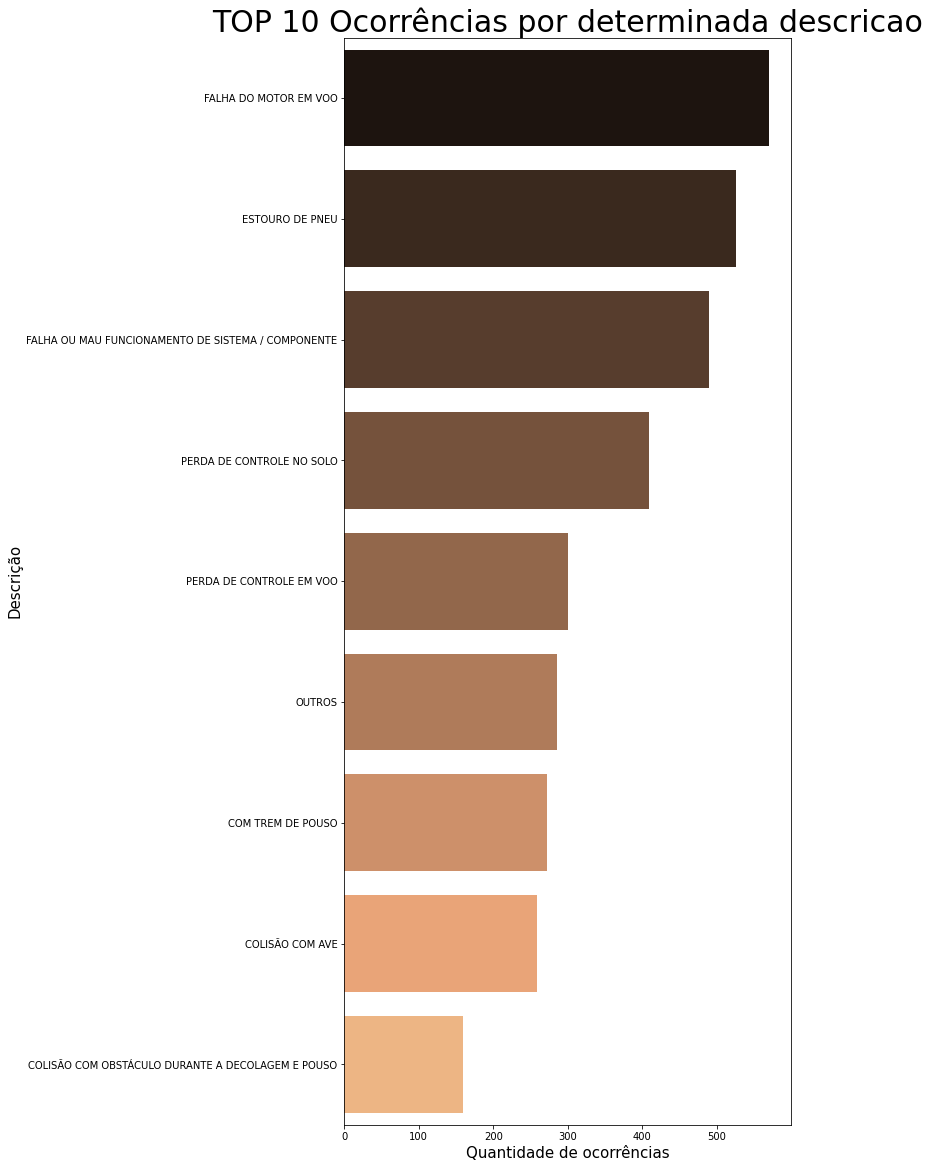

In [34]:
coluna_descricao = df_CENIPA['descricao']
incac_descricao = coluna_descricao.value_counts()

media_descricao = incac_descricao.mean()

moda_descricao = sts.mode(coluna_descricao)

desvio_descricao = sts.stdev(incac_descricao)

plt.figure(figsize = (8,20))
sns.countplot(data = df_CENIPA, y ='descricao', order = df_CENIPA['descricao'].value_counts().sort_values(ascending = False).index[0:9], palette='copper')

plt.xlabel('Quantidade de ocorrências', fontdict={'fontsize': 15})
plt.ylabel('Descrição', fontdict={'fontsize': 15})

plt.title('TOP 10 Ocorrências por determinada descricao', fontdict={'fontsize': 30})


print(incac_descricao)
print('')
print('A média por descrição de ocorrências é: {}'.format(media_descricao))
print('')
print('A moda por descrição de ocorrências é: {}'.format(moda_descricao))
print('')
print('O desvio padrão por descrição de ocorrências é: {}'.format(desvio_descricao))
print('')
print('')
print('TOP 10 Tipos de Ocorrências Dividas por Descricao')
df_CENIPA.groupby(['tipo', 'descricao']).agg({'quantidade':'count'}).sort_values(by='quantidade',  ascending = False).head(10)

* Perante as ocorrencias registradas. O maior motivo seria falha do motor em voo(moda) com 571 registros, seguindo de estouro do pneu com 526 registros, falha ou mau funcionamento de sistema/componentes com 490 registros, perda de controle no solo com 412 registros, perda de controle em voo com 305 registros,  outros com 223 registros, com trem de pouso com 126 registros, colisão com ave com 253 registros e colisão com obstaculo durante a decolagem e pouso com 156 registros. Devido a a maioria de problemas apresentados nas aeronaves ou acidentes naturais. Tendo uma media por descrição de ocorrencias de 64.95.É possivel notar-se que como nos gráficos acima o tipo de ocorrência predominante é Incidente, mas especificamente estouro de pneu, seguido por falha ou mau funcionamento de sistema.

## Analise de Dados como principal fonte coluna CIDADE
* **Contém estudos estatisticos como média, moda e desvio padrão. Além de agrupamento de dados por estado e cidade. Por fim um gráfico demonstrando os dados de ocorrências por cidade.** 

RIO DE JANEIRO    263
SÃO PAULO         238
BELO HORIZONTE    158
GOIÂNIA           127
LONDRINA          120
                 ... 
CAICÓ               1
MATA                1
PRADO               1
UBARANA             1
BURITI ALEGRE       1
Name: cidade, Length: 986, dtype: int64

A média ocorrências por cidade é: 4.874239350912779

A moda de ocorrências cidade é: RIO DE JANEIRO

O desvio padrão de ocorrências por cidade é: 16.756615654795915


TOP 10 Ocorrências Dividas por Cidade


quantidade
estado cidade                    
RJ     RIO DE JANEIRO         263
SP     SÃO PAULO              238
MG     BELO HORIZONTE         158
GO     GOIÂNIA                127
PR     LONDRINA               120
DF     BRASÍLIA               118
SP     GUARULHOS              115
       CAMPINAS               105
AM     MANAUS                  86
RS     PORTO ALEGRE            84

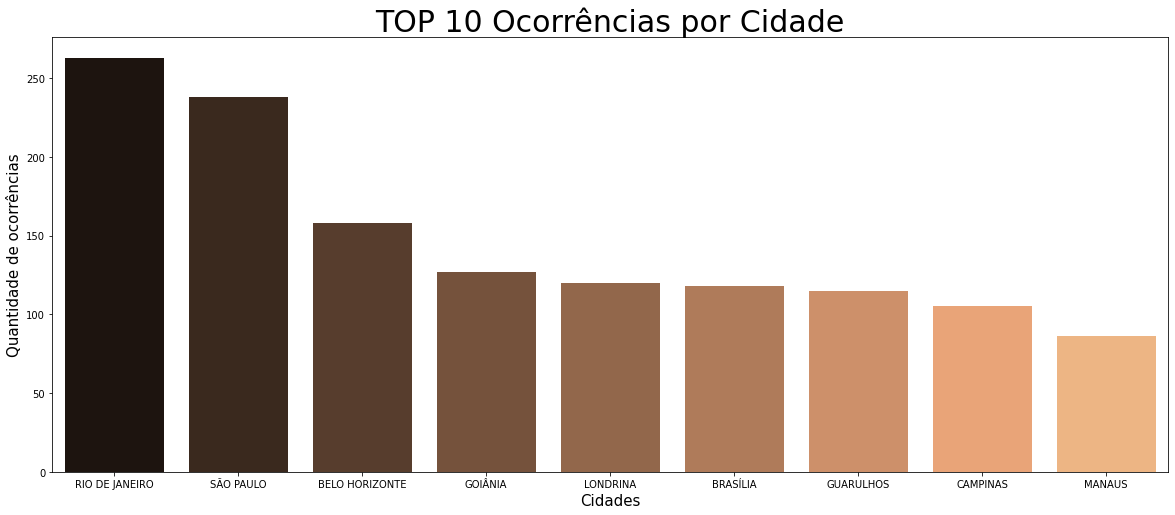

In [35]:
coluna_cidades = df_CENIPA['cidade']
incac_cidades = coluna_cidades.value_counts()

media_cidades= incac_cidades.mean()

moda_cidades = sts.mode(coluna_cidades)

desvio_cidades = sts.stdev(incac_cidades)

plt.figure(figsize = (20,8))
sns.countplot(data = df_CENIPA, x ='cidade',order = df_CENIPA['cidade'].value_counts().sort_values(ascending = False).index[0:9], palette='copper' )

plt.xlabel('Cidades', fontdict={'fontsize': 15})
plt.ylabel('Quantidade de ocorrências', fontdict={'fontsize': 15})

plt.title('TOP 10 Ocorrências por Cidade', fontdict={'fontsize': 30})


print(incac_cidades)
print('')
print('A média ocorrências por cidade é: {}'.format(media_cidades))
print('')
print('A moda de ocorrências cidade é: {}'.format(moda_cidades))
print('')
print('O desvio padrão de ocorrências por cidade é: {}'.format(desvio_cidades))
print('')
print('')
print('TOP 10 Ocorrências Dividas por Cidade')
df_CENIPA.groupby(['estado', 'cidade']).agg({'quantidade':'count'}).sort_values(by='quantidade',  ascending = False).head(10)

* De acordo com o CENIPA em relação aos relatorios de ocorrencias por cidades do brasil se da em primeiro lugar Rio de Janeiro(RJ) com 263 casos. São Paulo(SP) em segundo com 238 casos e Belo Horizonte(MG) com 158 casos registrados. Com uma media de ocorrencia por cidade de 4.87, tendo Rio de janeiro(RJ) como lider do ranking nacional de cidades devido ser a cidade com maior trafego aereo de cidades do brasil.É possivel observar que São Paulo é o estado com mais ocorrências pois duas cidades do mesmo encontran-se no top 10 quantidade de ocorrências.

## Analise de Dados como principal fonte coluna Estado
* **Contém estudos estatisticos como média, moda e desvio padrão. Além de agrupamento de dados por estado e ano. Por fim um gráfico demonstrando os dados de ocorrências por ano dividido por estado.** 

SP    1115
MG     443
RJ     441
PR     412
RS     311
GO     266
PA     243
MT     236
AM     205
BA     188
SC     147
MS     119
DF     118
PE      81
CE      70
ES      65
MA      61
AC      50
RR      43
TO      43
PI      34
AL      29
RO      26
PB      23
SE      18
RN      10
AP       9
Name: estado, dtype: int64

A média estadual de ocorrências é: 178.0

A moda estadual de ocorrências é: SP

O desvio padrão estadual de ocorrências é: 230.95354178175847


TOP 10 Ocorrências Dividas por Ano x Estados


,,quantidade
ano,estado,
2013,SP,151
2012,SP,142
2014,SP,126
2011,SP,125
2015,SP,114
2010,SP,100
2018,SP,94
2019,SP,92
2016,SP,92


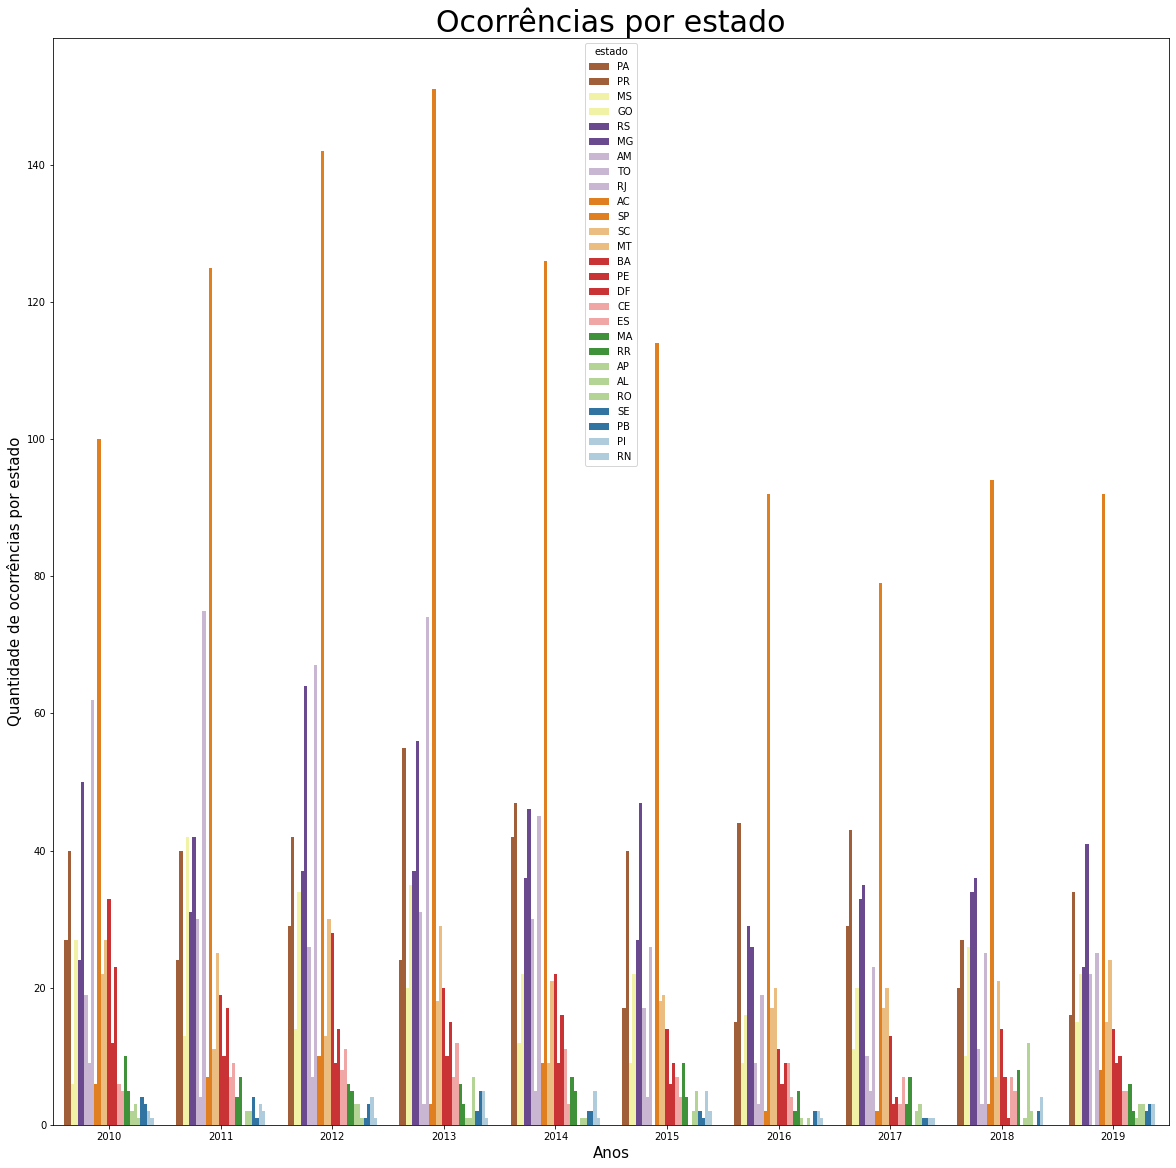

In [36]:
coluna_estados = df_CENIPA['estado']
incac_estados = coluna_estados.value_counts()

media_estados= incac_estados.mean()

moda_estados = sts.mode(coluna_estados)

desvio_estados = sts.stdev(incac_estados)

plt.figure(figsize = (20,20))
sns.countplot(data = df_CENIPA, x ='ano', hue = 'estado', palette = 'Paired_r' )

plt.xlabel('Anos', fontdict={'fontsize': 15})
plt.ylabel('Quantidade de ocorrências por estado', fontdict={'fontsize': 15})

plt.title('Ocorrências por estado', fontdict={'fontsize': 30})


print(incac_estados)
print('')
print('A média estadual de ocorrências é: {}'.format(media_estados))
print('')
print('A moda estadual de ocorrências é: {}'.format(moda_estados))
print('')
print('O desvio padrão estadual de ocorrências é: {}'.format(desvio_estados))
print('')
print('')
print('TOP 10 Ocorrências Dividas por Ano x Estados')
df_CENIPA.groupby(['ano', 'estado']).agg({'quantidade':'count'}).sort_values(by='quantidade',  ascending = False).head(10)

* De acordo com o CENIPA em relação aos relatorios de ocorrencias por estados anual, São Paulo lidera por ter 151 casos(2013), 142 casos(2012), 126 casos(2014), 125 casos(2011), 114 casos(2015), 100 casos(2010), 92 casos(2019), 94 casos(2018), 92 casos(2016), 81 casos(2017) sendo a moda estadual de ocorrencias. No geral a média estadual de ocorrências no Brasil é de 178 e o desvio padrão 230.9.

## Analise de Dados como principal fonte coluna DATA
* **Contém estudos estatisticos como média, moda e desvio padrão. Além de agrupamento de dados por data e ano. Por fim um gráfico demonstrando um top 10 com as data que possuem mais ocorrências por dia.** 

18/12/2013    9
15/07/2011    8
21/04/2010    7
09/02/2014    7
18/03/2018    6
             ..
08/07/2010    1
10/03/2018    1
24/02/2018    1
06/08/2014    1
21/07/2012    1
Name: data, Length: 2567, dtype: int64

A média de ocorrências por dia é: 1.872224386443319

A moda de ocorrências por dia é: 18/12/2013

O desvio padrão de ocorrências por dia é : 1.0583317507302814


TOP 10 Ocorrências Dividas por Data


,,quantidade
ano,data,
2013,18/12/2013,9
2011,15/07/2011,8
2010,21/04/2010,7
2014,09/02/2014,7
2012,24/09/2012,6
2018,18/03/2018,6
2015,20/05/2015,6
2014,09/04/2014,6
2017,09/07/2017,6


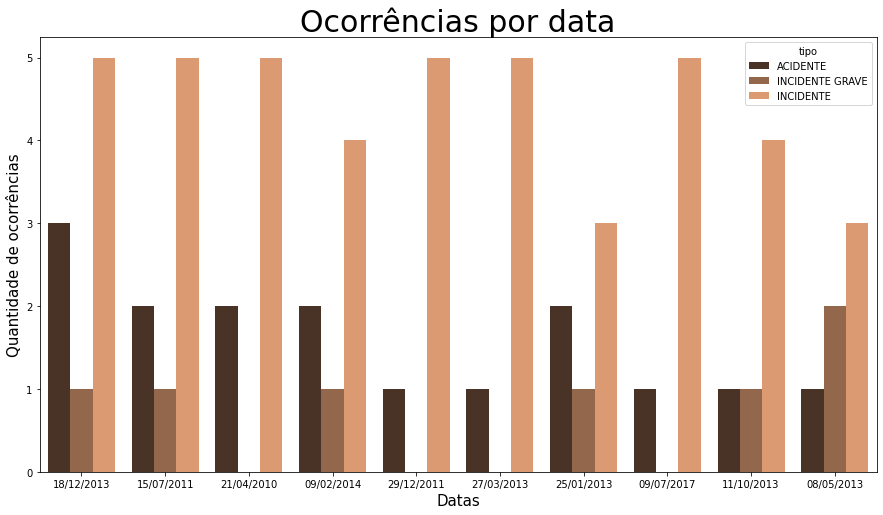

In [37]:
coluna_datas = df_CENIPA['data']
incac_datas = coluna_datas.value_counts()

media_datas= incac_datas.mean()

moda_datas = sts.mode(coluna_datas)

desvio_datas = sts.stdev(incac_datas)

plt.figure(figsize = (15,8))
sns.countplot(data = df_CENIPA, x ='data', hue = 'tipo', order = df_CENIPA['data'].value_counts().sort_values(ascending = False).index[0:10], palette='copper')

plt.xlabel('Datas', fontdict={'fontsize': 15})
plt.ylabel('Quantidade de ocorrências', fontdict={'fontsize': 15})

plt.title('Ocorrências por data', fontdict={'fontsize': 30})


print(incac_datas)
print('')
print('A média de ocorrências por dia é: {}'.format(media_datas))
print('')
print('A moda de ocorrências por dia é: {}'.format(moda_datas))
print('')
print('O desvio padrão de ocorrências por dia é : {}'.format(desvio_datas))
print('')
print('')
print('TOP 10 Ocorrências Dividas por Data')
df_CENIPA.groupby(['ano', 'data']).agg({'quantidade':'count'}).sort_values(by='quantidade',  ascending = False).head(10)

* De acordo com o CENIPA em relação aos relatorios de ocorrencias por data, tendo uma média de ocorrencias por dia de 1.87. O ano que mais possui ocorrencias por dia é 2013, tendo principais datas como 18/12/2013 com 9 casos, seguido de 15/7(2011) com 8 casos e 21/04(2010) com 7 casos. 

## Analise de Dados como principal fonte coluna ANO
* **Contém estudos estatisticos como média, moda e desvio padrão. Além de agrupamento de dados por ano e tipo de ocorrência. Por fim um gráfico demonstrando dados das ocorrências por ano.** 

2013    631
2012    612
2011    556
2014    535
2010    529
2015    430
2019    403
2018    380
2017    376
2016    354
Name: ano, dtype: int64

A média anual de ocorrências é: 480.6

A moda anual de ocorrências é: 2013

O desvio padrão anual de ocorrências é: 103.57198248346681


Tipos de Ocorrências Dividas por Ano


quantidade
ano  tipo                       
2010 ACIDENTE                118
     INCIDENTE               351
     INCIDENTE GRAVE          60
2011 ACIDENTE                182
     INCIDENTE               310
     INCIDENTE GRAVE          64
2012 ACIDENTE                193
     INCIDENTE               344
     INCIDENTE GRAVE          75
2013 ACIDENTE                187
     INCIDENTE               375
     INCIDENTE GRAVE          69
2014 ACIDENTE                159
     INCIDENTE               303
     INCIDENTE GRAVE          73
2015 ACIDENTE                150
     INCIDENTE               232
     INCIDENTE GRAVE          48
2016 ACIDENTE                145
     INCIDENTE               162
     INCIDENTE GRAVE          47
2017 ACIDENTE                128
     INCIDENTE               197
     INCIDENTE GRAVE          51
2018 ACIDENTE                143
     INCIDENTE               168
     INCIDENTE GRAVE          69
2019 ACIDENTE                127
     INCIDENTE               207
     INCIDENTE GRAVE          69

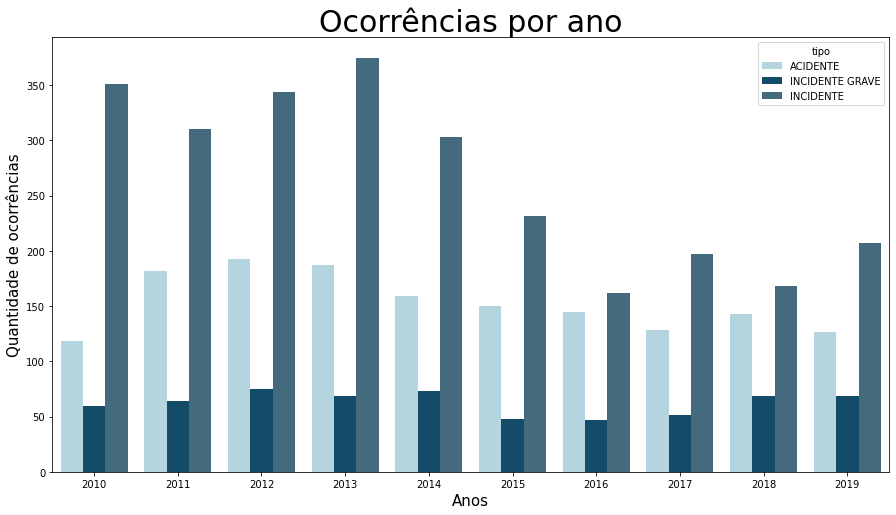

In [38]:
coluna_ano = df_CENIPA['ano']
incac_ano = coluna_ano.value_counts()

media_ano= incac_ano.mean()

moda_ano = sts.mode(coluna_ano)

desvio_ano = sts.stdev(incac_ano)

plt.figure(figsize = (15,8))
sns.countplot(data = df_CENIPA, x ='ano', hue = 'tipo', palette =['#ADD8E6',"#054F77",'#3A6D87'] )

plt.xlabel('Anos', fontdict={'fontsize': 15})
plt.ylabel('Quantidade de ocorrências', fontdict={'fontsize': 15})

plt.title('Ocorrências por ano', fontdict={'fontsize': 30})


print(incac_ano)
print('')
print('A média anual de ocorrências é: {}'.format(media_ano))
print('')
print('A moda anual de ocorrências é: {}'.format(moda_ano))
print('')
print('O desvio padrão anual de ocorrências é: {}'.format(desvio_ano))
print('')
print('')
print('Tipos de Ocorrências Dividas por Ano')
df_CENIPA.groupby(['ano', 'tipo']).agg({'quantidade':'count'})

De acordo com o CENIPA em relação aos relatorios de ocorrencias anuais, se tem uma media anual de ocorrencias em 480.7 e visando acidentes, incidentes e incidentes graves temos na liderança 2013 com 631 casos seguidos de 2012 com 621, 2011 com 556, 2014 com 553, 2010 com 529, 2015 com 430, 2019 com 40, 2017 com 377, 2018 com 380 e 2016 com 354.                                                       

## Analise de Dados como principal fonte coluna HORA
* **Contém estudos estatisticos como média, moda e desvio padrão. Além de agrupamento de dados por hora e tipo de ocorrência. Por fim um gráfico demonstrando dados das ocorrências por hora.** 

00:00:00    131
20:00:00     96
19:00:00     80
13:00:00     77
13:30:00     75
           ... 
15:56:00      1
09:54:00      1
09:12:00      1
15:23:00      1
15:49:00      1
Name: hora, Length: 881, dtype: int64

A média ocorrências  por hora é: 5.45516458569807

A moda de ocorrências  por hora é: 00:00:00

O desvio padrão de ocorrências  por hora é: 11.230866507144043


TOP 10 Ocorrências Dividas por hora e tipo


quantidade
hora     tipo                 
00:00:00 INCIDENTE         104
20:00:00 INCIDENTE          42
         ACIDENTE           41
20:30:00 ACIDENTE           40
19:00:00 ACIDENTE           37
13:00:00 ACIDENTE           36
12:00:00 ACIDENTE           36
19:30:00 ACIDENTE           35
13:30:00 ACIDENTE           35
18:00:00 ACIDENTE           35

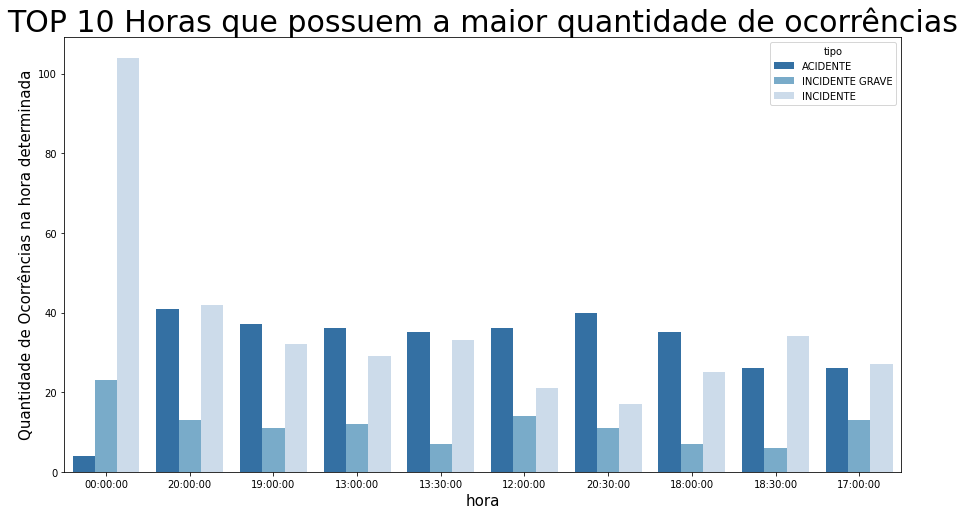

In [39]:
coluna_hora = df_CENIPA['hora']
incac_hora = coluna_hora.value_counts()

media_hora = incac_hora.mean()

moda_hora = sts.mode(coluna_hora)

desvio_hora = sts.stdev(incac_hora)

plt.figure(figsize = (15,8))
sns.countplot(data = df_CENIPA, x ='hora', hue = 'tipo',order = df_CENIPA['hora'].value_counts().sort_values(ascending = False).index[0:10], palette = 'Blues_r')

plt.xlabel('hora', fontdict={'fontsize': 15})
plt.ylabel('Quantidade de Ocorrências na hora determinada', fontdict={'fontsize': 15})

plt.title('TOP 10 Horas que possuem a maior quantidade de ocorrências', fontdict={'fontsize': 30})


print(incac_hora)
print('')
print('A média ocorrências  por hora é: {}'.format(media_hora))
print('')
print('A moda de ocorrências  por hora é: {}'.format(moda_hora))
print('')
print('O desvio padrão de ocorrências  por hora é: {}'.format(desvio_hora))
print('')
print('')
print('TOP 10 Ocorrências Dividas por hora e tipo')
df_CENIPA.groupby(['hora', 'tipo']).agg({'quantidade':'count'}).sort_values(by='quantidade',  ascending = False).head(10)

* De acordo com o CENIPA, o horario que possui maior quantidade de ocorrencias é 00:00 relatando 104 casos de incidentes seguido de 20:00 com 41 acidentes e 42  incidentes, 20:30 com 40 acidentes e por quarto lugar as 12:00 com 37 acidentes registrados. Tendo uma media de ocorrencias por hora de 5.45.

## Analise de Dados como principal fonte coluna AERONAVE_LIBERADA
* **Contém estudos estatisticos como média, moda e desvio padrão. Além de agrupamento de dados por liberação e tipo de ocorrência. Por fim um gráfico demonstrando dados das ocorrências por tipo de ocorrência e liberação.** 

SIM              2417
INDETERMINADO    2270
NÃO               119
Name: aeronave_liberada, dtype: int64

A média por tipo de liberação da aeronave de ocorrências é: 1602.0

A moda por tipo de liberação da aeronave de ocorrências é: SIM

O desvio padrão por tipo de liberação da aeronave de ocorrências é: 1286.4171174234273


Tipos de Ocorrências Dividas por tipo de liberação da aeronave


quantidade
tipo            aeronave_liberada            
ACIDENTE        INDETERMINADO             488
                NÃO                       103
                SIM                       941
INCIDENTE       INDETERMINADO            1609
                NÃO                         7
                SIM                      1033
INCIDENTE GRAVE INDETERMINADO             173
                NÃO                         9
                SIM                       443

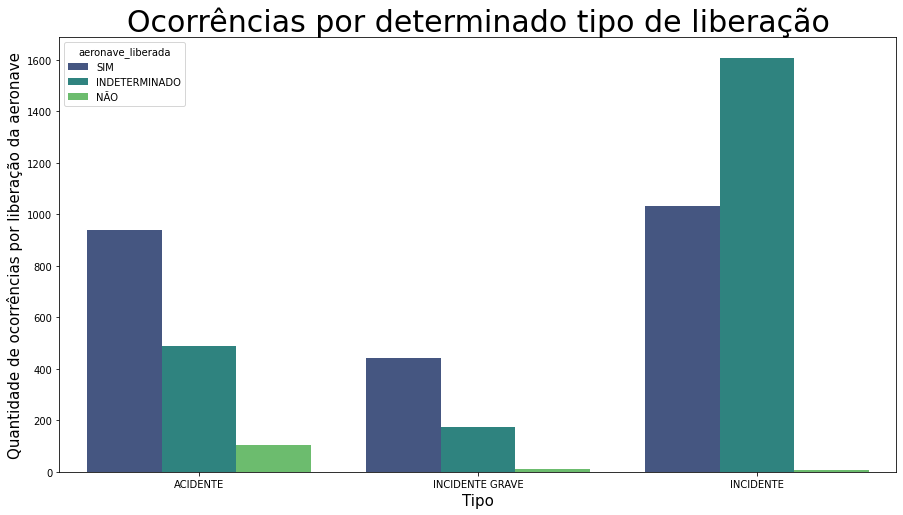

In [40]:
coluna_aeronave_liberada = df_CENIPA['aeronave_liberada']
incac_aeronave_liberada = coluna_aeronave_liberada.value_counts()

media_aeronave_liberada = incac_aeronave_liberada.mean()

moda_aeronave_liberada = sts.mode(coluna_aeronave_liberada)

desvio_aeronave_liberada = sts.stdev(incac_aeronave_liberada)

plt.figure(figsize = (15,8))
sns.countplot(data = df_CENIPA, x ='tipo', hue = 'aeronave_liberada', palette = 'viridis' )

plt.xlabel('Tipo', fontdict={'fontsize': 15})
plt.ylabel('Quantidade de ocorrências por liberação da aeronave', fontdict={'fontsize': 15})

plt.title('Ocorrências por determinado tipo de liberação', fontdict={'fontsize': 30})


print(incac_aeronave_liberada)
print('')
print('A média por tipo de liberação da aeronave de ocorrências é: {}'.format(media_aeronave_liberada))
print('')
print('A moda por tipo de liberação da aeronave de ocorrências é: {}'.format(moda_aeronave_liberada))
print('')
print('O desvio padrão por tipo de liberação da aeronave de ocorrências é: {}'.format(desvio_aeronave_liberada))
print('')
print('')
print('Tipos de Ocorrências Dividas por tipo de liberação da aeronave')
df_CENIPA.groupby(['tipo', 'aeronave_liberada']).agg({'quantidade':'count'})

* De acordo com o CENIPA, em prol de todos as ocorrências de 2010 ate 2019, tem-se uma media de 1602.3 de ocorrencia por status de liberações. Baseando-se em indeterminado acidente com 488 casos, acidentes sem liberação da aeronave 103 casos e com 941 casos.

## Analise de Dados como principal fonte coluna STATUS_INVESTIGAÇÃO
* **Contém estudos estatisticos como média, moda e desvio padrão. Além de agrupamento de dados por status da investigação e tipo de ocorrência. Por fim um gráfico demonstrando dados das ocorrências por tipo de ocorrência e status da investigação.** 

FINALIZADA       3768
ATIVA             744
INDETERMINADA     294
Name: status_investigacao, dtype: int64

A média por status da investigação é: 1602.0

A moda por status da investigação é: FINALIZADA

O desvio padrão por status da investigação é: 1889.2569968111802


Investigações por tipo de ocorrência


quantidade
tipo            status_investigacao            
ACIDENTE        ATIVA                       516
                FINALIZADA                  837
                INDETERMINADA               179
INCIDENTE       ATIVA                        36
                FINALIZADA                 2580
                INDETERMINADA                33
INCIDENTE GRAVE ATIVA                       192
                FINALIZADA                  351
                INDETERMINADA                82

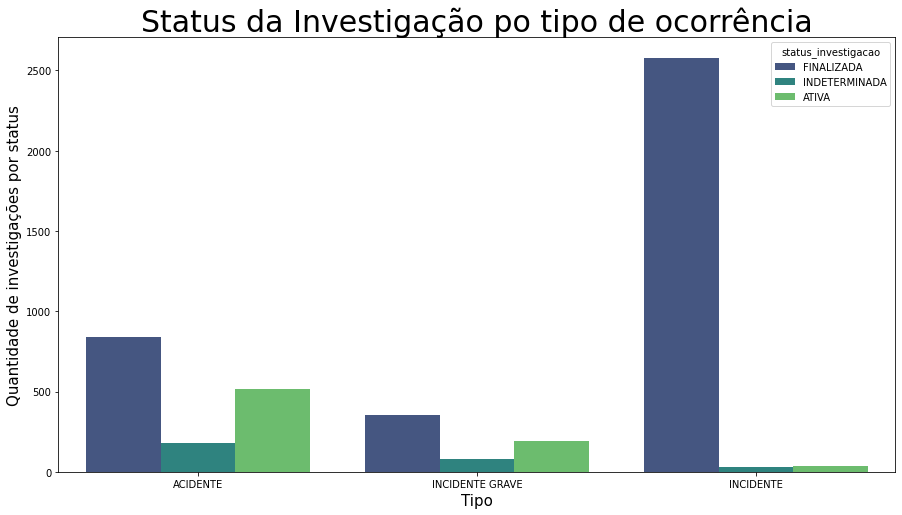

In [41]:
coluna_status_investigacao = df_CENIPA['status_investigacao']
incac_status_investigacao = coluna_status_investigacao.value_counts()

media_status_investigacao = incac_status_investigacao.mean()

moda_status_investigacao = sts.mode(coluna_status_investigacao)

desvio_status_investigacao = sts.stdev(incac_status_investigacao)

plt.figure(figsize = (15,8))
sns.countplot(data = df_CENIPA, x ='tipo', hue = 'status_investigacao', palette = 'viridis' )

plt.xlabel('Tipo', fontdict={'fontsize': 15})
plt.ylabel('Quantidade de investigações por status', fontdict={'fontsize': 15})

plt.title('Status da Investigação po tipo de ocorrência', fontdict={'fontsize': 30})


print(incac_status_investigacao)
print('')
print('A média por status da investigação é: {}'.format(media_status_investigacao))
print('')
print('A moda por status da investigação é: {}'.format(moda_status_investigacao))
print('')
print('O desvio padrão por status da investigação é: {}'.format(desvio_status_investigacao))
print('')
print('')
print('Investigações por tipo de ocorrência')
df_CENIPA.groupby(['tipo', 'status_investigacao']).agg({'quantidade':'count'})

* De acordo com o CENIPA, temos um total de 3768 casos finalizados, 744 casos ativos e 294 casos indeterminados sendo assim a media e de 1602. Levando em consideração acidentes temos em ativo 516 casos, finalizado 846 e indeterminado com 179 casos. 

1    4755
2      49
3       2
Name: aeronaves_envolvidas, dtype: int64

A moda por aeronaves envolvidas é: 1

O desvio padrão por aeronaves envolvidas é: 2730.6792195349494


Investigações por tipo de ocorrência


quantidade
tipo            aeronaves_envolvidas            
ACIDENTE        1                           1521
                2                             11
INCIDENTE       1                           2622
                2                             26
                3                              1
INCIDENTE GRAVE 1                            612
                2                             12
                3                              1

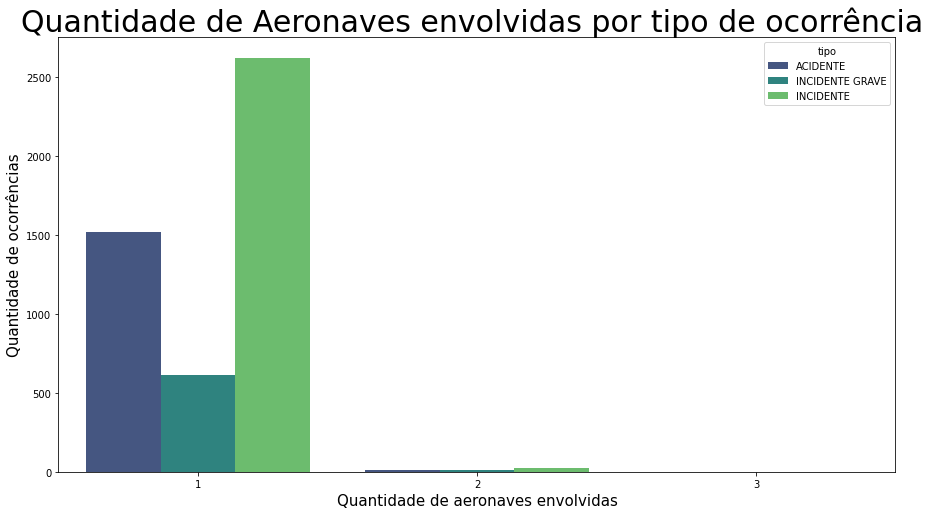

In [42]:
coluna_aeronaves_envolvidas = df_CENIPA['aeronaves_envolvidas']
incac_aeronaves_envolvidas = coluna_aeronaves_envolvidas.value_counts()

moda_aeronaves_envolvidas = sts.mode(coluna_aeronaves_envolvidas)

desvio_aeronaves_envolvidas = sts.stdev(incac_aeronaves_envolvidas)

plt.figure(figsize = (15,8))
sns.countplot(data = df_CENIPA, x ='aeronaves_envolvidas', hue = 'tipo', palette = 'viridis' )

plt.xlabel('Quantidade de aeronaves envolvidas', fontdict={'fontsize': 15})
plt.ylabel('Quantidade de ocorrências', fontdict={'fontsize': 15})

plt.title('Quantidade de Aeronaves envolvidas por tipo de ocorrência ', fontdict={'fontsize': 30})


print(incac_aeronaves_envolvidas)
print('')
print('A moda por aeronaves envolvidas é: {}'.format(moda_aeronaves_envolvidas))
print('')
print('O desvio padrão por aeronaves envolvidas é: {}'.format(desvio_aeronaves_envolvidas))
print('')
print('')
print('Investigações por tipo de ocorrência')
df_CENIPA.groupby(['tipo', 'aeronaves_envolvidas']).agg({'quantidade':'count'})

* De acordo com o CENIPA, temos ao total de 1 aeronave envolvida 4845 casos devidos a erros de momento, naturais ou de central. 2 aeronaves envolvidas com 50 registros e 3 envolvidas com 2 casos. E levando em consideração acidentes com 1 aeronave temos 1550 casos e com 2 aeronaves 11 casos. incidentes temos com 1 aeronave 2678 casos, com 2 aeronaves temos 26 e com 3 aeronaves 1 caso. E sobre incidentes graves com 1 aeronave temos 617 casos, com 2 aeronaves 13 e com 3 aeronaves 1. Tendo uma moda por aeronaves envolvidas de 1.

NÃO    4379
SIM     427
Name: ocorrencia_saida_pista, dtype: int64

A moda por classificação de saida é: NÃO

O desvio padrão por classificação de saida é: 2794.4859992492356


Tipos de ocorrências por classificação de saida


quantidade
tipo            ocorrencia_saida_pista            
ACIDENTE        NÃO                           1309
                SIM                            223
INCIDENTE       NÃO                           2611
                SIM                             38
INCIDENTE GRAVE NÃO                            459
                SIM                            166

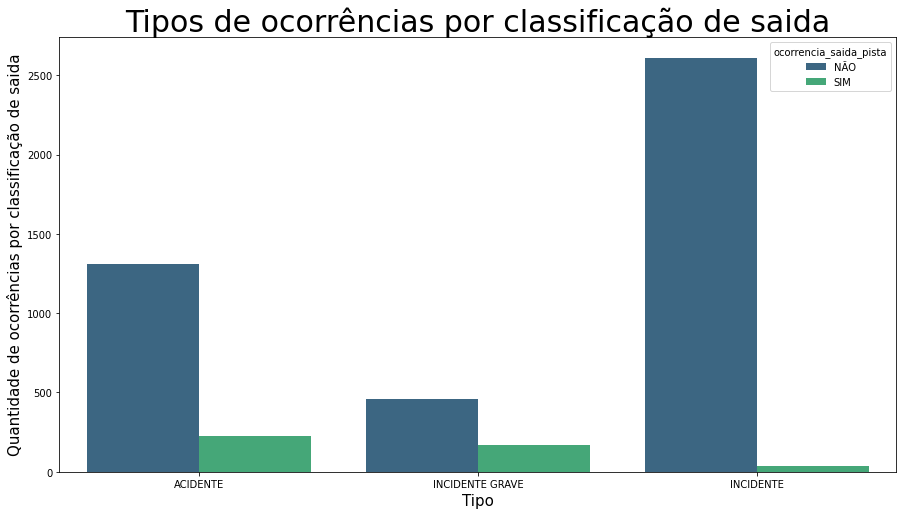

In [43]:
coluna_ocorrencia_saida_pista = df_CENIPA['ocorrencia_saida_pista']
incac_ocorrencia_saida_pista = coluna_ocorrencia_saida_pista.value_counts()


moda_ocorrencia_saida_pista = sts.mode(coluna_ocorrencia_saida_pista)

desvio_ocorrencia_saida_pista = sts.stdev(incac_ocorrencia_saida_pista)

plt.figure(figsize = (15,8))
sns.countplot(data = df_CENIPA, x ='tipo', hue = 'ocorrencia_saida_pista', palette = 'viridis' )

plt.xlabel('Tipo', fontdict={'fontsize': 15})
plt.ylabel('Quantidade de ocorrências por classificação de saida', fontdict={'fontsize': 15})

plt.title('Tipos de ocorrências por classificação de saida', fontdict={'fontsize': 30})


print(incac_ocorrencia_saida_pista)
print('')
print('A moda por classificação de saida é: {}'.format(moda_ocorrencia_saida_pista))
print('')
print('O desvio padrão por classificação de saida é: {}'.format(desvio_ocorrencia_saida_pista))
print('')
print('')
print('Tipos de ocorrências por classificação de saida')
df_CENIPA.groupby(['tipo', 'ocorrencia_saida_pista']).agg({'quantidade':'count'})

* De acordo com o CENIPA em relação a ocorrencias por saida de pista temos uma moda de classificação em "NÃO' devido a acidentes por conta da saida na pista da aeronave. Sendo assim não temos acidente com 1332 casos e com sim acidentes 229 casos. Nao incidentes com 2667 casos e sim incidentes com 38 casos. Nao incidentes graves com 464 casos e sim incidentes graves com 167 casos.

AVIÃO          3927
HELICÓPTERO     588
ULTRALEVE       264
PLANADOR         14
ANFÍBIO          11
HIDROAVIÃO        1
BALÃO             1
Name: aeronave_tipo, dtype: int64

A média por tipo de aeronave é: 686.5714285714286

A moda por tipo de aeronave é: AVIÃO

O desvio padrão por tipo de aeronave é: 1445.5348326418678


Ocorências por tipo de aeronave


quantidade
tipo            aeronave_tipo            
INCIDENTE       AVIÃO                2261
ACIDENTE        AVIÃO                1126
INCIDENTE GRAVE AVIÃO                 540
INCIDENTE       HELICÓPTERO           333
ACIDENTE        HELICÓPTERO           204
                ULTRALEVE             186
INCIDENTE GRAVE HELICÓPTERO            51
INCIDENTE       ULTRALEVE              48
INCIDENTE GRAVE ULTRALEVE              30
ACIDENTE        PLANADOR                9
                ANFÍBIO                 6
INCIDENTE       ANFÍBIO                 4
INCIDENTE GRAVE PLANADOR                3
INCIDENTE       PLANADOR                2
                HIDROAVIÃO              1
INCIDENTE GRAVE ANFÍBIO                 1
ACIDENTE        BALÃO                   1

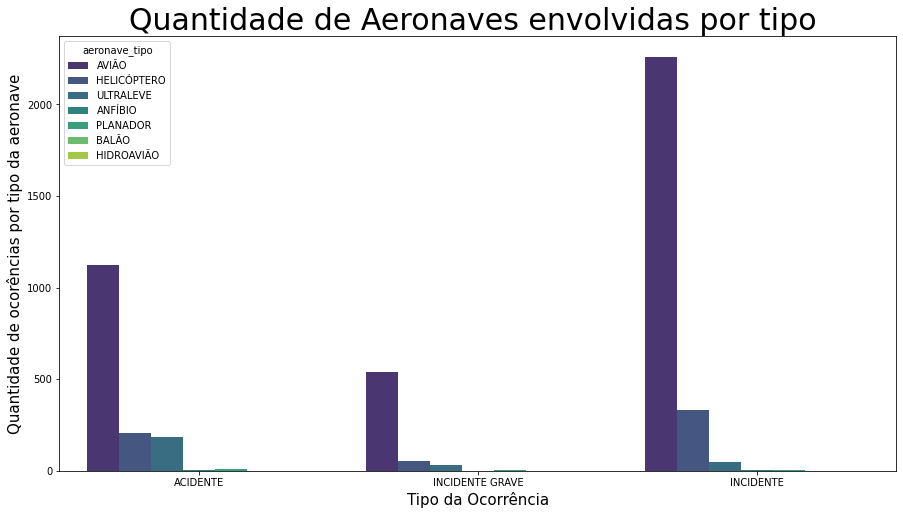

In [44]:
coluna_aeronave_tipo = df_CENIPA['aeronave_tipo']
incac_aeronave_tipo = coluna_aeronave_tipo.value_counts()

media_aeronave_tipo = incac_aeronave_tipo.mean()

moda_aeronave_tipo = sts.mode(coluna_aeronave_tipo)

desvio_aeronave_tipo = sts.stdev(incac_aeronave_tipo)

plt.figure(figsize = (15,8))
sns.countplot(data = df_CENIPA, x ='tipo', hue = 'aeronave_tipo', palette = 'viridis' )

plt.xlabel('Tipo da Ocorrência', fontdict={'fontsize': 15})
plt.ylabel('Quantidade de ocorências por tipo da aeronave', fontdict={'fontsize': 15})

plt.title('Quantidade de Aeronaves envolvidas por tipo ', fontdict={'fontsize': 30})



print(incac_aeronave_tipo)
print('')
print('A média por tipo de aeronave é: {}'.format(media_aeronave_tipo))
print('')
print('A moda por tipo de aeronave é: {}'.format(moda_aeronave_tipo))
print('')
print('O desvio padrão por tipo de aeronave é: {}'.format(desvio_aeronave_tipo))
print('')
print('')
print('Ocorências por tipo de aeronave')
df_CENIPA.groupby(['tipo', 'aeronave_tipo']).agg({'quantidade':'count'}).sort_values(by='quantidade',  ascending = False)

* De acordo com o CENIPA em relação aos tipos de envolvimentos de aeronaves, temos uma media de 544.1 diante de todas aeronaves envolvidas. Sendo 4004 casos de avião, 590 de helicoptero, 273 ultraleves, 14 planadores, 11 anfibios, indeterminado 2 e trike,hidroavião e balão com 1 caso cada. Tendo uma moda de aeronave em "avião" pois apresenta o maior caso de envolvimento com ocorrencias.

PISTÃO        2801
JATO           906
TURBOÉLICE     597
TURBOEIXO      487
SEM TRAÇÃO      15
Name: motor_tipo, dtype: int64

A média por tipo de motor é: 961.2

A moda por tipo de motor é: PISTÃO

O desvio padrão por tipo de motor é: 1077.1156855231475


Ocorências por tipo de moto


quantidade
tipo            aeronave_tipo motor_tipo            
ACIDENTE        ANFÍBIO       PISTÃO               2
                              TURBOÉLICE           4
                AVIÃO         JATO                22
                              PISTÃO            1007
                              TURBOÉLICE          97
                BALÃO         SEM TRAÇÃO           1
                HELICÓPTERO   PISTÃO             102
                              TURBOEIXO          102
                PLANADOR      SEM TRAÇÃO           9
                ULTRALEVE     PISTÃO             186
INCIDENTE       ANFÍBIO       PISTÃO               2
                              TURBOÉLICE           2
                AVIÃO         JATO               826
                              PISTÃO             971
                              TURBOEIXO           36
                              TURBOÉLICE         428
                HELICÓPTERO   PISTÃO              27
                              TURBOEIXO          305
                              TURBOÉLICE           1
                HIDROAVIÃO    PISTÃO               1
                PLANADOR      SEM TRAÇÃO           2
                ULTRALEVE     PISTÃO              48
INCIDENTE GRAVE ANFÍBIO       PISTÃO               1
                AVIÃO         JATO                58
                              PISTÃO             416
                              TURBOEIXO            1
                              TURBOÉLICE          65
                HELICÓPTERO   PISTÃO               8
                              TURBOEIXO           43
                PLANADOR      SEM TRAÇÃO           3
                ULTRALEVE     PISTÃO              30

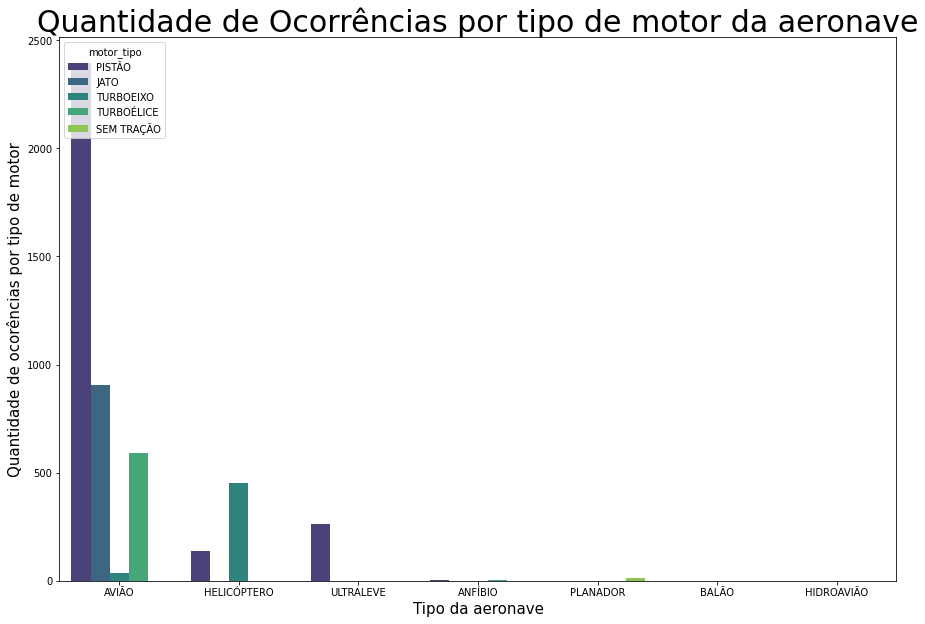

In [45]:
coluna_motor_tipo = df_CENIPA['motor_tipo']
incac_motor_tipo = coluna_motor_tipo.value_counts()

media_motor_tipo = incac_motor_tipo.mean()

moda_motor_tipo = sts.mode(coluna_motor_tipo)

desvio_motor_tipo = sts.stdev(incac_motor_tipo)

plt.figure(figsize = (15,10))
sns.countplot(data = df_CENIPA, x ='aeronave_tipo', hue = 'motor_tipo', palette = 'viridis' )

plt.xlabel('Tipo da aeronave', fontdict={'fontsize': 15})
plt.ylabel('Quantidade de ocorências por tipo de motor', fontdict={'fontsize': 15})

plt.title('Quantidade de Ocorrências por tipo de motor da aeronave', fontdict={'fontsize': 30})

print(incac_motor_tipo)
print('')
print('A média por tipo de motor é: {}'.format(media_motor_tipo))
print('')
print('A moda por tipo de motor é: {}'.format(moda_motor_tipo))
print('')
print('O desvio padrão por tipo de motor é: {}'.format(desvio_motor_tipo))
print('')
print('')
print('Ocorências por tipo de moto')
df_CENIPA.groupby(['tipo', 'aeronave_tipo', 'motor_tipo']).agg({'quantidade':'count'})

De acordo com o CENIPA em relação a quantidade por tipo de motor temos uma media de 816.16 e uma moda em "pistão" sendo o maior causador de ocorrencias com 2826 casos. Seguido de jato com 940 casos, turboélice com 607 casos, turboeixo com 489 casos, indeterminado com 20 casos e sem tração com 15 casos.

CESSNA AIRCRAFT                     746
NEIVA INDUSTRIA AERONAUTICA         577
EMBRAER                             559
PIPER AIRCRAFT                      350
BEECH AIRCRAFT                      254
                                   ... 
SEBASTIÃO DE PAULA DO NASCIMENTO      1
IVAN MOLCHAN                          1
JOÃO ISMAEL VICENTINI                 1
GLOBE AIRCRAFT                        1
RODRIGO DE QUEIROZ R. COSTA           1
Name: aeronave_fabricante, Length: 201, dtype: int64

A média por fabricante da aeronave é: 23.91044776119403

A moda por fabricante da aeronave é: CESSNA AIRCRAFT

O desvio padrão por fabricante da aeronave é: 88.6203810660872


Top 10 Ocorências por fabricante da aeronave


,quantidade
aeronave_fabricante,
CESSNA AIRCRAFT,746
NEIVA INDUSTRIA AERONAUTICA,577
EMBRAER,559
PIPER AIRCRAFT,350
BEECH AIRCRAFT,254
BOEING COMPANY,234
AIRBUS INDUSTRIE,229
AEROSPATIALE AND ALENIA,227
AERO BOERO,178


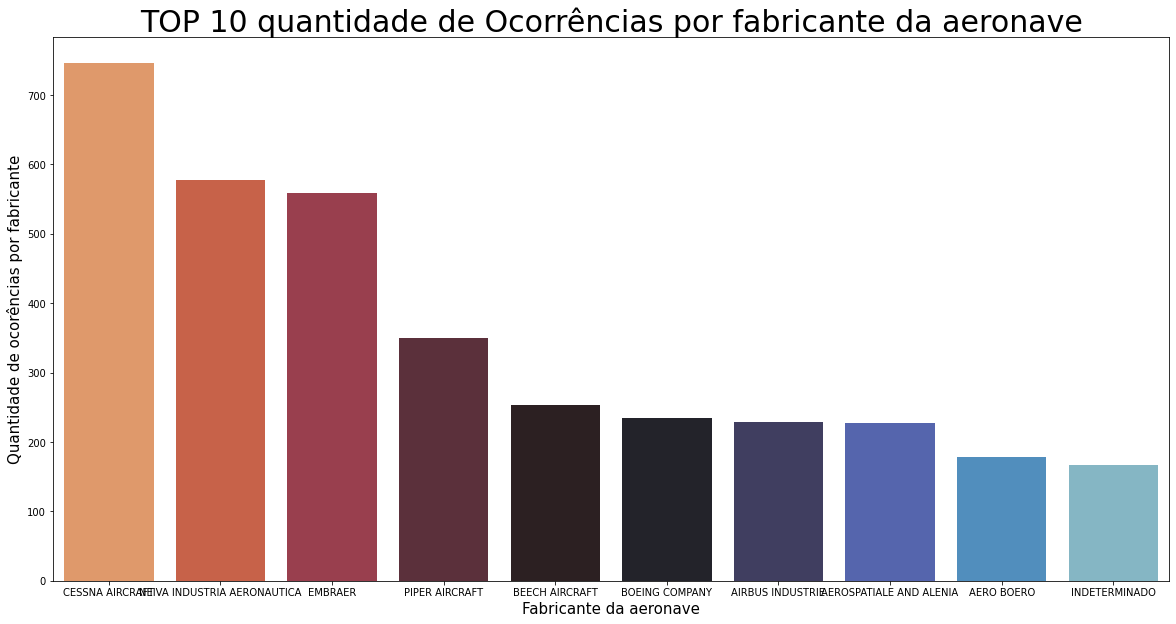

In [46]:
coluna_aeronave_fabricante = df_CENIPA['aeronave_fabricante']
incac_aeronave_fabricante = coluna_aeronave_fabricante.value_counts()

media_aeronave_fabricante = incac_aeronave_fabricante.mean()

moda_aeronave_fabricante = sts.mode(coluna_aeronave_fabricante)

desvio_aeronave_fabricante = sts.stdev(incac_aeronave_fabricante)

plt.figure(figsize = (20,10))
sns.countplot(data = df_CENIPA, x ='aeronave_fabricante', order = df_CENIPA['aeronave_fabricante'].value_counts().sort_values(ascending = False).index[0:10], palette='icefire_r' )

plt.xlabel('Fabricante da aeronave', fontdict={'fontsize': 15})
plt.ylabel('Quantidade de ocorências por fabricante', fontdict={'fontsize': 15})

plt.title('TOP 10 quantidade de Ocorrências por fabricante da aeronave', fontdict={'fontsize': 30})

print(incac_aeronave_fabricante)
print('')
print('A média por fabricante da aeronave é: {}'.format(media_aeronave_fabricante))
print('')
print('A moda por fabricante da aeronave é: {}'.format(moda_aeronave_fabricante))
print('')
print('O desvio padrão por fabricante da aeronave é: {}'.format(desvio_aeronave_fabricante))
print('')
print('')
print('Top 10 Ocorências por fabricante da aeronave')
df_CENIPA.groupby(['aeronave_fabricante']).agg({'quantidade':'count'}).sort_values(by='quantidade',  ascending = False).head(10)

* De acordo com o CENIPA, a CESSNA AIRCRAFT lidera o número de ocorrências por fabricante com um total de 765, em segundo está a NEIVA INDUSTRIA AERONAUTICA com um total de 577, em terceiro vem a EMBRAER com 568, em seguida vem PIPER AIRCRAFT com 352, BEECH AIRCRAFT com 256, BOEING COMPANY com 253, AIRBUS INDUSTRIE com 234, AEROSPATIALE AND ALENIA com 232, AERO BOERO com 178 e INDETERMINADO com 178.  A média de ocorrências por fabricante é de 23,5 e tendo a "CESNA AIRCRAFT" como moda.

MONOMOTOR      2515
BIMOTOR        2214
TRIMOTOR         59
SEM TRAÇÃO       17
QUADRIMOTOR       1
Name: aeronave_motor_quantidade, dtype: int64

A moda por quantidade de motores da aeronave é: MONOMOTOR

O desvio padrão por quantidade de motores da aeronave é: 1285.618994881454


Ocorências por tipo de aeronave e quantidade de motores


quantidade
aeronave_tipo aeronave_motor_quantidade            
ANFÍBIO       MONOMOTOR                          11
AVIÃO         BIMOTOR                          1960
              MONOMOTOR                        1905
              QUADRIMOTOR                         1
              SEM TRAÇÃO                          2
              TRIMOTOR                           59
BALÃO         SEM TRAÇÃO                          1
HELICÓPTERO   BIMOTOR                           254
              MONOMOTOR                         334
HIDROAVIÃO    MONOMOTOR                           1
PLANADOR      SEM TRAÇÃO                         14
ULTRALEVE     MONOMOTOR                         264

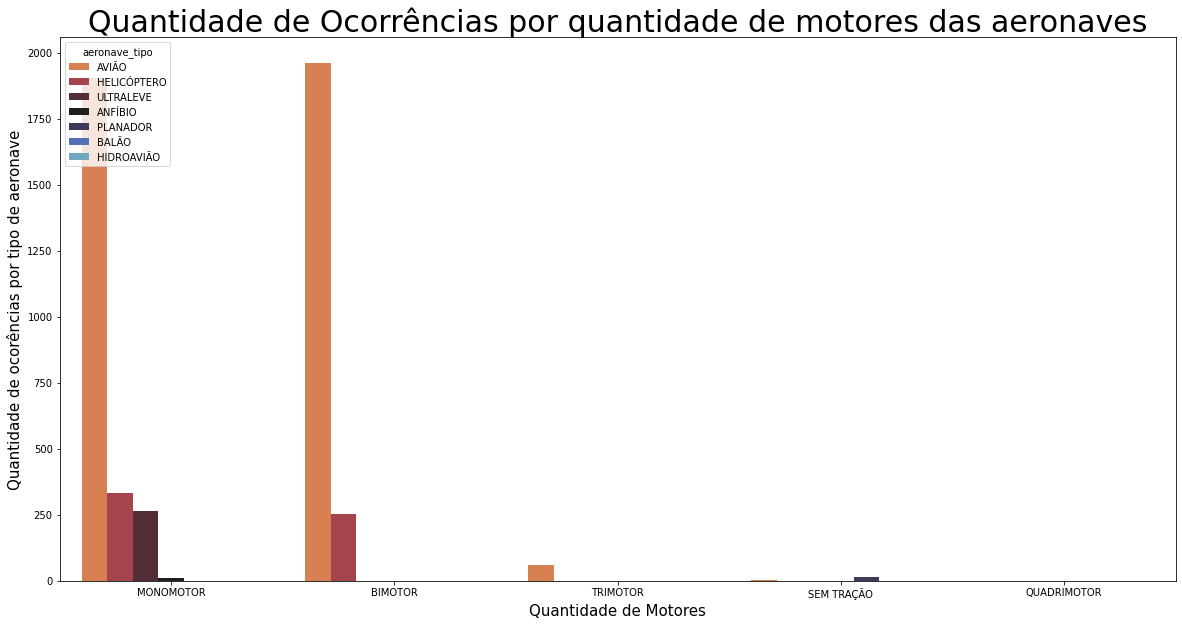

In [47]:
coluna_aeronave_motor_quantidade = df_CENIPA['aeronave_motor_quantidade']
incac_aeronave_motor_quantidade = coluna_aeronave_motor_quantidade.value_counts()


moda_aeronave_motor_quantidade = sts.mode(coluna_aeronave_motor_quantidade)

desvio_aeronave_motor_quantidade = sts.stdev(incac_aeronave_motor_quantidade)

plt.figure(figsize = (20,10))
sns.countplot(data = df_CENIPA, x ='aeronave_motor_quantidade', hue = df_CENIPA['aeronave_tipo'], palette='icefire_r' )

plt.xlabel('Quantidade de Motores', fontdict={'fontsize': 15})
plt.ylabel('Quantidade de ocorências por tipo de aeronave', fontdict={'fontsize': 15})

plt.title('Quantidade de Ocorrências por quantidade de motores das aeronaves', fontdict={'fontsize': 30})

print(incac_aeronave_motor_quantidade)
print('')
print('A moda por quantidade de motores da aeronave é: {}'.format(moda_aeronave_motor_quantidade))
print('')
print('O desvio padrão por quantidade de motores da aeronave é: {}'.format(desvio_aeronave_motor_quantidade))
print('')
print('')
print('Ocorências por tipo de aeronave e quantidade de motores')
df_CENIPA.groupby(['aeronave_tipo','aeronave_motor_quantidade']).agg({'quantidade':'count'})

* Segundo o CENIPA, o MONOMOTOR é o que mais tem ocorrências registradas, tendo um número de 2539 ocorrências por motor, destacando que 1926 dessas ocorrências pertence do tipo de aeronave AVIÃO! Em segundo está o BIMOTOR com um total de 2249 se destacando tambem nos AVIÕES com 1994 registros, em terceiro vem aeronaves TRI MOTOR com um número de 66 ocorrências registradas, em seguida o SEM TRAÇÃO com 27, INDETERMINADO com 12 e QUADRIMOTOR com 4 ocorrências. 

6      875
2      785
4      601
1      478
7      294
      ... 
19       1
79       1
151      1
167      1
249      1
Name: aeronave_assentos, Length: 77, dtype: int64

A média por fabricante da aeronave é: 62.41558441558441

A moda por quantidade de assentos da aeronave é: 6

O desvio padrão por quantidade de assentos da aeronave é: 158.240186413046


TOP 10 Ocorências por quantidade de assentos e tipo de aeronave


,,quantidade
aeronave_assentos,aeronave_tipo,
6,AVIÃO,746
4,AVIÃO,524
2,AVIÃO,469
1,AVIÃO,455
2,ULTRALEVE,250
7,AVIÃO,248
10,AVIÃO,141
8,AVIÃO,131
6,HELICÓPTERO,128


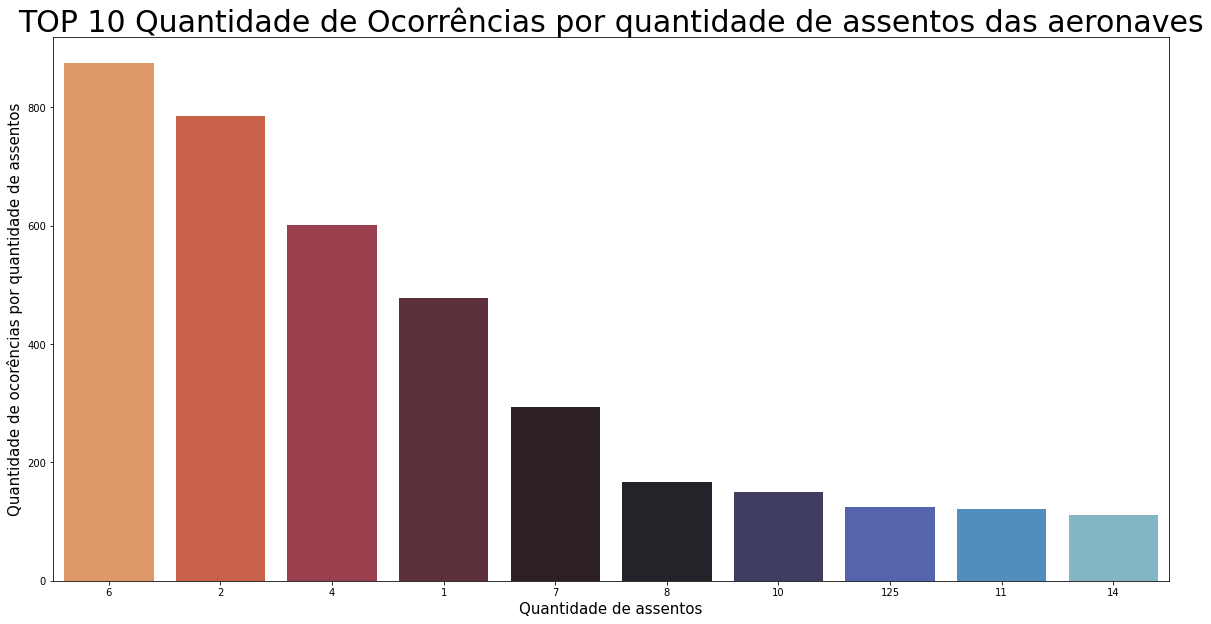

In [48]:
coluna_aeronave_assentos = df_CENIPA['aeronave_assentos']
incac_aeronave_assentos = coluna_aeronave_assentos.value_counts()

media_aeronave_assentos = incac_aeronave_assentos.mean()

moda_aeronave_assentos = sts.mode(coluna_aeronave_assentos)

desvio_aeronave_assentos= sts.stdev(incac_aeronave_assentos)

plt.figure(figsize = (20,10))
sns.countplot(data = df_CENIPA, x ='aeronave_assentos',order = df_CENIPA['aeronave_assentos'].value_counts().sort_values(ascending = False).index[0:10], palette='icefire_r' )

plt.xlabel('Quantidade de assentos', fontdict={'fontsize': 15})
plt.ylabel('Quantidade de ocorências por quantidade de assentos', fontdict={'fontsize': 15})

plt.title('TOP 10 Quantidade de Ocorrências por quantidade de assentos das aeronaves', fontdict={'fontsize': 30})

print(incac_aeronave_assentos)
print('')
print('A média por fabricante da aeronave é: {}'.format(media_aeronave_assentos))
print('')
print('A moda por quantidade de assentos da aeronave é: {}'.format(moda_aeronave_assentos))
print('')
print('O desvio padrão por quantidade de assentos da aeronave é: {}'.format(desvio_aeronave_assentos))
print('')
print('')
print('TOP 10 Ocorências por quantidade de assentos e tipo de aeronave')
df_CENIPA.groupby(['aeronave_assentos','aeronave_tipo']).agg({'quantidade':'count'}).sort_values(by='quantidade',  ascending = False).head(10)

A média por fabricante da aeronave é de 816.16. O total de ocorrências por quantidade de assentos são; 746 ocorrências por 6 assentos pelo tipo de aeronave que é o avião, 524 ocorrências por 4 assentos do tipo avião, 469 ocorrências por 2 assentos do avião, 455 ocorrências por 1 assento do avião, 251 ocorrencias por 2 assentos do tipo ultraleve, 248 ocorrencias por 7 assentos do tipo avião, 141 ocorrencias por 10 assentos do tipo avião, 131 ocorrencias por 8 assentos do tipo avião, 128 ocorrencias por 6 assentos do tipo helicoptero e 125 ocorrencias por 125 assentos do tipo avião. Tendo uma moda de 6 assentos.

2008    226
2010    219
2009    216
2011    196
2012    191
       ... 
1956      1
1957      1
1954      1
1940      1
1942      1
Name: aeronave_ano_fabricacao, Length: 77, dtype: int64

A moda por ano de fabricação da aeronave é: 6

O desvio padrão por ano de fabricação da aeronave é: 61.12290264389029


Ocorências por ano de fabricação e tipo


,,quantidade
aeronave_ano_fabricacao,tipo,
2008,INCIDENTE,158
2010,INCIDENTE,151
2009,INCIDENTE,151
2012,INCIDENTE,132
2011,INCIDENTE,126
2007,INCIDENTE,106
1980,INCIDENTE,96
2006,INCIDENTE,87
1992,INCIDENTE,85


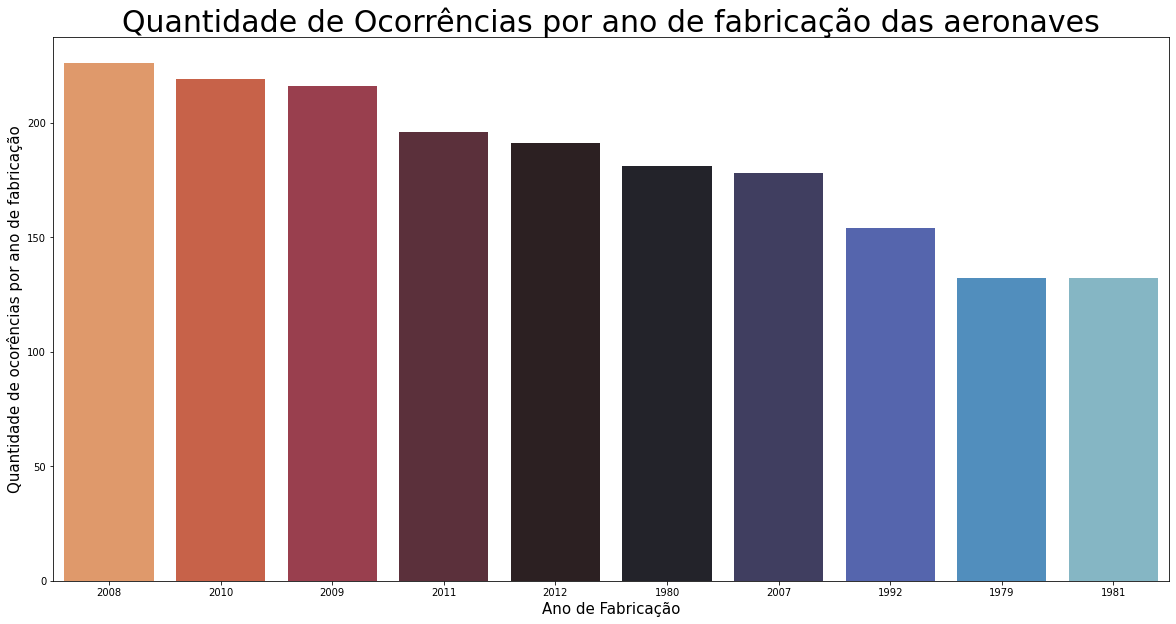

In [49]:
coluna_aeronave_ano_fabricacao = df_CENIPA['aeronave_ano_fabricacao']
incac_aeronave_ano_fabricacao = coluna_aeronave_ano_fabricacao.value_counts()

moda_aeronave_ano_fabricacao = sts.mode(coluna_aeronave_ano_fabricacao)

desvio_aeronave_ano_fabricacao = sts.stdev(incac_aeronave_ano_fabricacao)

plt.figure(figsize = (20,10))
sns.countplot(data = df_CENIPA, x ='aeronave_ano_fabricacao',order = df_CENIPA['aeronave_ano_fabricacao'].value_counts().sort_values(ascending = False).index[0:10], palette='icefire_r' )

plt.xlabel('Ano de Fabricação', fontdict={'fontsize': 15})
plt.ylabel('Quantidade de ocorências por ano de fabricação', fontdict={'fontsize': 15})

plt.title('Quantidade de Ocorrências por ano de fabricação das aeronaves', fontdict={'fontsize': 30})

print(incac_aeronave_ano_fabricacao)
print('')
print('A moda por ano de fabricação da aeronave é: {}'.format(moda_aeronave_assentos))
print('')
print('O desvio padrão por ano de fabricação da aeronave é: {}'.format(desvio_aeronave_ano_fabricacao))
print('')
print('')
print('Ocorências por ano de fabricação e tipo')
df_CENIPA.groupby(['aeronave_ano_fabricacao','tipo']).agg({'quantidade':'count'}).sort_values(by='quantidade',  ascending = False).head(10)


OCORRENCIAS POR PAIS FABRICANTE DA AERONAVE: De acordo com o CENIPA, o pais que mais tem ocorrências é o Brasil com 4837, sendo 2658 incidentes, 1551 acidentes e 628 incidentes graves. Ocupando o segundo lugar estão os Estados Unidos com 31 ocorrência, sendo 25 por incidentes, 5 acidentes e 1 incidente grave, em terceiro tem um total de 10 ocorrências que não foram identificadas com 1 acidente 7 incidentes e incidente graves 2 e seguidos de Bolivia com um total de 3 ocorrencias com 1 acidente e 2 incidentes, Paraguai com 3 acidentes, Chile com 3 incidentes ao total, Panama com 2 incidentes ao total, Espanha com 2 incidentes e Venezuela, Colombia, Suiça, Portugal, Argentina e Alemanha com 1 incidente cada.

BRASIL              4788
NÃO IDENTIFICADO       7
ESTADOS UNIDOS         5
CHILE                  2
BOLÍVIA                1
PORTUGAL               1
ARGENTINA              1
ESPANHA                1
Name: aeronave_pais_fabricante, dtype: int64

A moda por país fabricante da aeronave é: BRASIL

O desvio padrão por país fabricante da aeronave é: 1691.9060046502077


TOP 10 Ocorências por país fabricante e tipo de aeronave


quantidade
aeronave_pais_fabricante tipo                       
BRASIL                   INCIDENTE              2637
                         ACIDENTE               1528
                         INCIDENTE GRAVE         623
NÃO IDENTIFICADO         INCIDENTE                 5
ESTADOS UNIDOS           ACIDENTE                  3
CHILE                    INCIDENTE                 2
ESTADOS UNIDOS           INCIDENTE                 2
NÃO IDENTIFICADO         INCIDENTE GRAVE           2
ARGENTINA                INCIDENTE                 1
BOLÍVIA                  ACIDENTE                  1

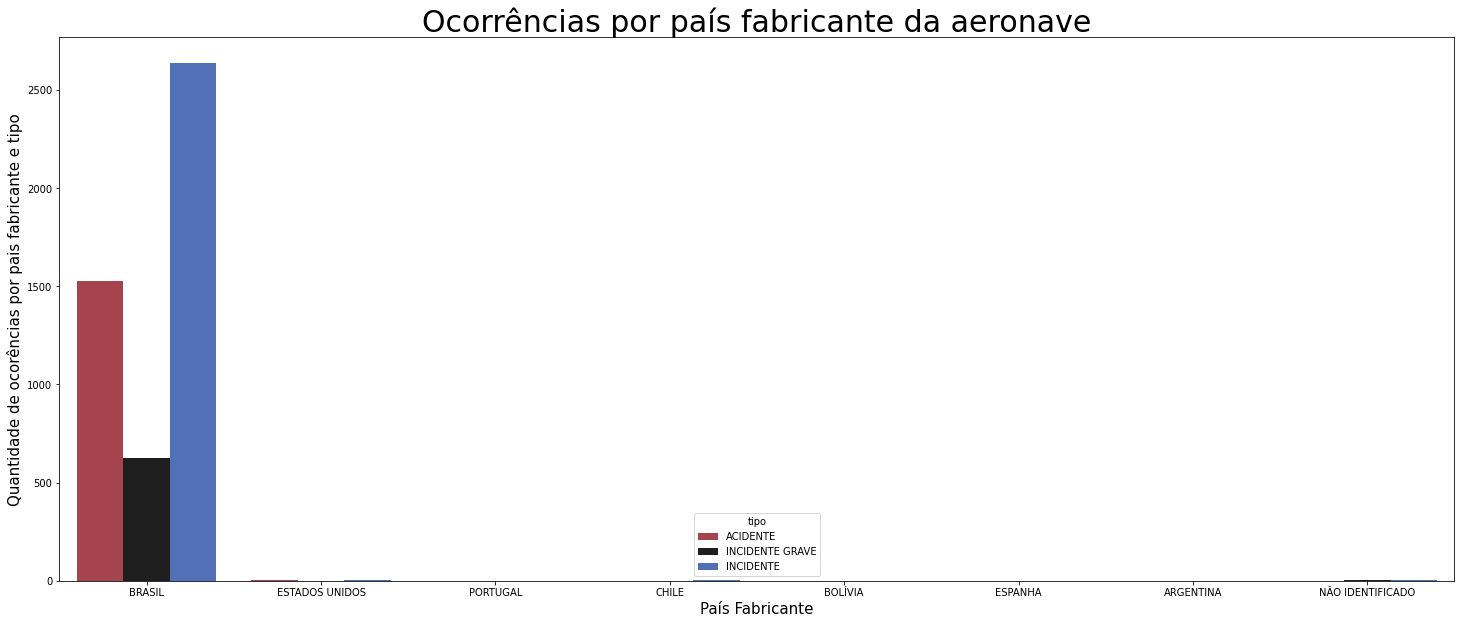

In [50]:
coluna_aeronave_pais_fabricante = df_CENIPA['aeronave_pais_fabricante']
incac_aeronave_pais_fabricante = coluna_aeronave_pais_fabricante.value_counts()

moda_aeronave_pais_fabricante = sts.mode(coluna_aeronave_pais_fabricante)

desvio_aeronave_pais_fabricante= sts.stdev(incac_aeronave_pais_fabricante)

plt.figure(figsize = (25,10))
sns.countplot(data = df_CENIPA, x ='aeronave_pais_fabricante', hue = 'tipo', palette='icefire_r' )

plt.xlabel('País Fabricante', fontdict={'fontsize': 15})
plt.ylabel('Quantidade de ocorências por pais fabricante e tipo', fontdict={'fontsize': 15})

plt.title('Ocorrências por país fabricante da aeronave', fontdict={'fontsize': 30})

print(incac_aeronave_pais_fabricante)
print('')
print('A moda por país fabricante da aeronave é: {}'.format(moda_aeronave_pais_fabricante))
print('')
print('O desvio padrão por país fabricante da aeronave é: {}'.format(desvio_aeronave_pais_fabricante))
print('')
print('')
print('TOP 10 Ocorências por país fabricante e tipo de aeronave')
df_CENIPA.groupby(['aeronave_pais_fabricante','tipo']).agg({'quantidade':'count'}).sort_values(by='quantidade',  ascending = False).head(10)

* OCORRENCIAS POR PAIS FABRICANTE DA AERONAVE: De acordo com o CENIPA, o pais que mais tem ocorrências é o Brasil com 4837, sendo 2658 incidentes, 1551 acidentes e 628 incidentes graves. Ocupando o segundo lugar estão os Estados Unidos com 31 ocorrência, sendo 25 por incidentes, 5 acidentes e 1 incidente grave, em terceiro tem um total de 10 ocorrências que não foram identificadas com 1 acidente 7 incidentes e incidente graves 2 e seguidos de Bolivia com um total de 3 ocorrencias com 1 acidente e 2 incidentes, Paraguai com 3 acidentes, Chile com 3 incidentes ao total, Panama com 2 incidentes ao total, Espanha com 2 incidentes e Venezuela, Colombia, Suiça, Portugal, Argentina e Alemanha com 1 incidente cada.

POUSO                              862
DECOLAGEM                          774
CRUZEIRO                           660
CORRIDA APÓS POUSO                 512
TÁXI                               372
SUBIDA                             308
APROXIMAÇÃO FINAL                  250
MANOBRA                            181
ESPECIALIZADA                      152
DESCIDA                            144
CIRCUITO DE TRÁFEGO                125
OUTRA FASE                          81
INDETERMINADA                       81
ESTACIONAMENTO                      57
VOO A BAIXA ALTURA                  43
ARREMETIDA NO SOLO                  42
OPERAÇÃO DE SOLO                    31
PARTIDA DO MOTOR                    25
ARREMETIDA NO AR                    22
PAIRADO                             17
RETA FINAL                          14
DECOLAGEM VERTICAL                  12
PROCEDIMENTO DE APROXIMAÇÃO IFR     11
CHEQUE DE MOTOR OU ROTOR             6
PUSHBACK                             5
SAÍDA IFR                

quantidade
tipo            aeronave_fase_operacao            
INCIDENTE       POUSO                          415
                DECOLAGEM                      397
                CRUZEIRO                       374
                TÁXI                           325
ACIDENTE        DECOLAGEM                      294
INCIDENTE       CORRIDA APÓS POUSO             278
ACIDENTE        POUSO                          259
INCIDENTE       SUBIDA                         228
ACIDENTE        CRUZEIRO                       215
INCIDENTE GRAVE POUSO                          188

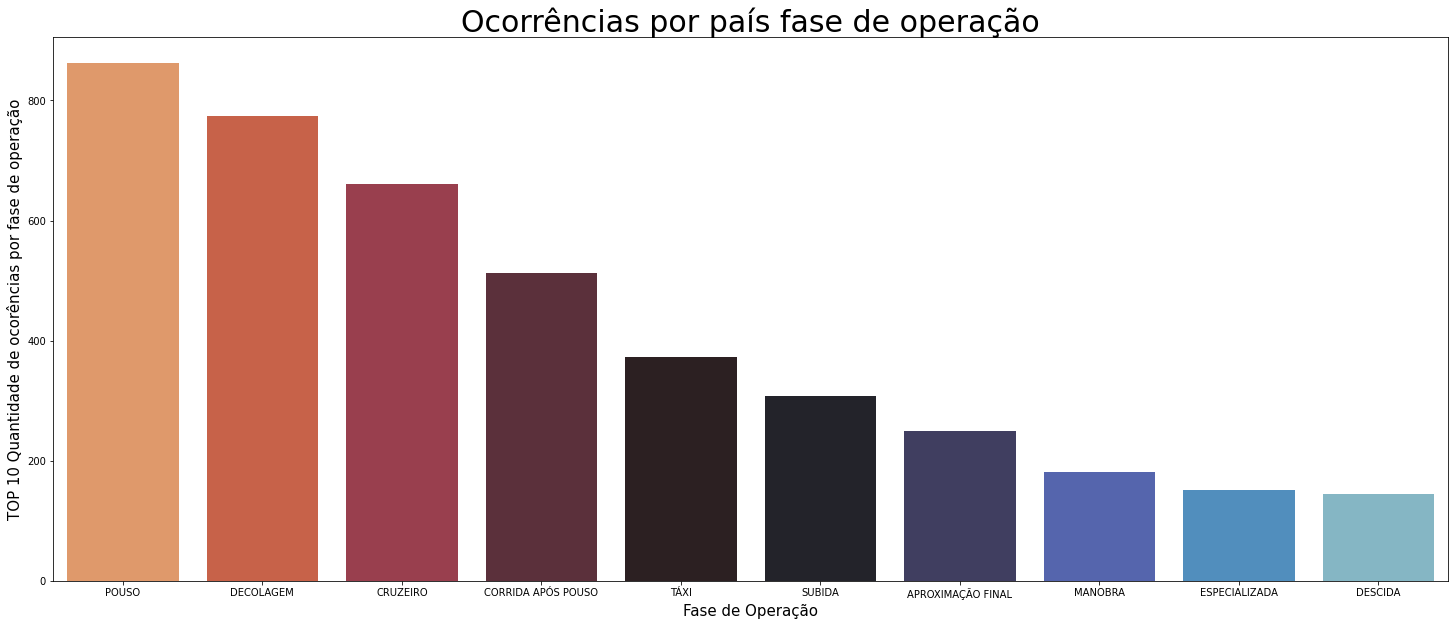

In [51]:
coluna_aeronave_fase_operacao = df_CENIPA['aeronave_fase_operacao']
incac_aeronave_fase_operacao = coluna_aeronave_fase_operacao.value_counts()

media_aeronave_fase_operacao = incac_aeronave_fase_operacao.mean()

moda_aeronave_fase_operacao = sts.mode(coluna_aeronave_fase_operacao)

desvio_aeronave_fase_operacao= sts.stdev(incac_aeronave_fase_operacao)

plt.figure(figsize = (25,10))
sns.countplot(data = df_CENIPA, x ='aeronave_fase_operacao', order = df_CENIPA['aeronave_fase_operacao'].value_counts().sort_values(ascending = False).index[0:10], palette='icefire_r' )

plt.xlabel('Fase de Operação', fontdict={'fontsize': 15})
plt.ylabel('TOP 10 Quantidade de ocorências por fase de operação', fontdict={'fontsize': 15})

plt.title('Ocorrências por país fase de operação', fontdict={'fontsize': 30})

print(incac_aeronave_fase_operacao)
print('')
print('A média por fase de operação é: {}'.format(media_aeronave_fase_operacao))
print('')
print('A moda por país fase de operação é: {}'.format(moda_aeronave_fase_operacao))
print('')
print('O desvio padrão por fase de operação é: {}'.format(desvio_aeronave_fase_operacao))
print('')
print('')
print('TOP 10 Ocorências por fas de operação')
df_CENIPA.groupby(['tipo','aeronave_fase_operacao']).agg({'quantidade':'count'}).sort_values(by='quantidade',  ascending = False).head(10)

NENHUM           1681
LEVE             1409
SUBSTANCIAL      1392
DESTRUÍDA         289
INDETERMINADO      35
Name: aeronave_nivel_dano, dtype: int64

A média de ocorrências por nível de dano da aeronave é: 961.2

A moda por nível de dano da aeronave é: NENHUM

O desvio padrão por nível de dano da aeronave é: 743.9631711314747


Ocorências por nível de dano e tipo de aeronave


quantidade
aeronave_nivel_dano tipo                       
DESTRUÍDA           ACIDENTE                289
INDETERMINADO       ACIDENTE                 21
                    INCIDENTE                11
                    INCIDENTE GRAVE           3
LEVE                ACIDENTE                 52
                    INCIDENTE              1077
                    INCIDENTE GRAVE         280
NENHUM              ACIDENTE                 22
                    INCIDENTE              1506
                    INCIDENTE GRAVE         153
SUBSTANCIAL         ACIDENTE               1148
                    INCIDENTE                55
                    INCIDENTE GRAVE         189

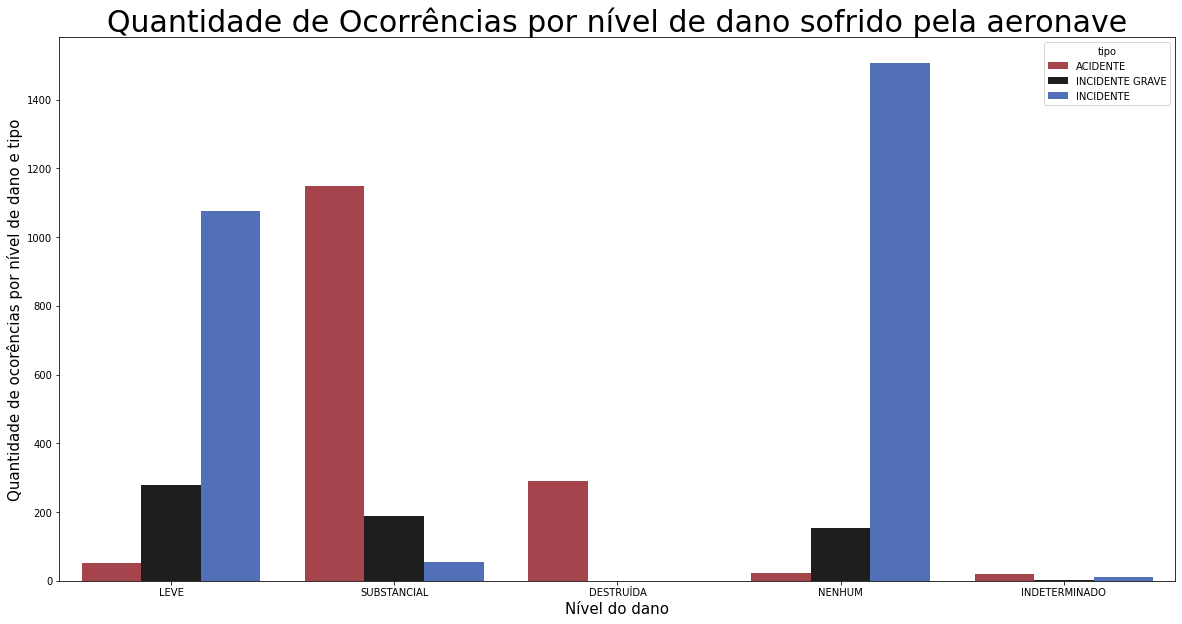

In [52]:
coluna_aeronave_nivel_dano = df_CENIPA['aeronave_nivel_dano']
incac_aeronave_nivel_dano = coluna_aeronave_nivel_dano.value_counts()

media_aeronave_nivel_dano = incac_aeronave_nivel_dano.mean()

moda_aeronave_nivel_dano = sts.mode(coluna_aeronave_nivel_dano)

desvio_aeronave_nivel_dano= sts.stdev(incac_aeronave_nivel_dano)

plt.figure(figsize = (20,10))
sns.countplot(data = df_CENIPA, x ='aeronave_nivel_dano',hue = 'tipo', palette='icefire_r' )

plt.xlabel('Nível do dano', fontdict={'fontsize': 15})
plt.ylabel('Quantidade de ocorências por nível de dano e tipo', fontdict={'fontsize': 15})

plt.title('Quantidade de Ocorrências por nível de dano sofrido pela aeronave', fontdict={'fontsize': 30})

print(incac_aeronave_nivel_dano)
print('')
print('A média de ocorrências por nível de dano da aeronave é: {}'.format(media_aeronave_nivel_dano))
print('')
print('A moda por nível de dano da aeronave é: {}'.format(moda_aeronave_nivel_dano))
print('')
print('O desvio padrão por nível de dano da aeronave é: {}'.format(desvio_aeronave_nivel_dano))
print('')
print('')
print('Ocorências por nível de dano e tipo de aeronave')
df_CENIPA.groupby(['aeronave_nivel_dano','tipo']).agg({'quantidade':'count'})

É possivel notar que a maioria das ocorrências não causaram nenhum dano pois a maioria são classificadas como incidentes.

# Regressão Linear

* Importando as bibliotecas para Regressão

In [53]:
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn import linear_model

import statsmodels.api as sm

import warnings
warnings.filterwarnings('ignore')

* Estudo de Correlação de Variaveis

In [54]:
x_values = df_CENIPA['aeronave_assentos']
y_values = df_CENIPA['aeronave_ano_fabricacao']

X = df_CENIPA['aeronave_assentos']
y = df_CENIPA['aeronave_ano_fabricacao']
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())


                               OLS Regression Results                              
Dep. Variable:     aeronave_ano_fabricacao   R-squared:                       0.136
Model:                                 OLS   Adj. R-squared:                  0.136
Method:                      Least Squares   F-statistic:                     755.1
Date:                     Mon, 06 Dec 2021   Prob (F-statistic):          1.61e-154
Time:                             02:43:57   Log-Likelihood:                -19616.
No. Observations:                     4806   AIC:                         3.924e+04
Df Residuals:                         4804   BIC:                         3.925e+04
Df Model:                                1                                         
Covariance Type:                 nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------

* Elaboração do gráfico de Regressão Linear

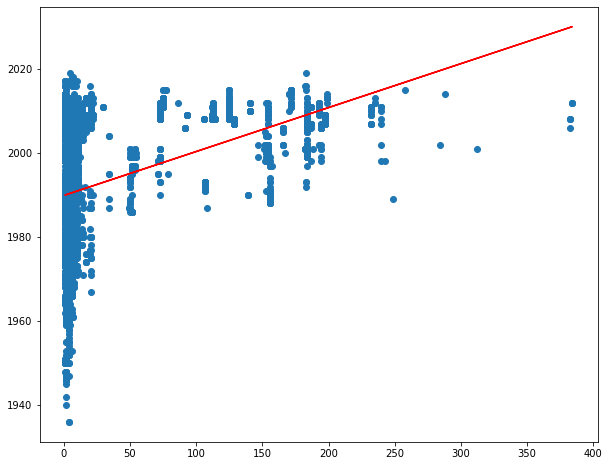

In [55]:
plt.figure(1, figsize=(10, 8))
plt.scatter(df_CENIPA['aeronave_assentos'].values, df_CENIPA['aeronave_ano_fabricacao'].values)
fit = np.polyfit(df_CENIPA['aeronave_assentos'].values, df_CENIPA['aeronave_ano_fabricacao'].values, 1)
fit_fn = np.poly1d(fit) 
plt.plot(df_CENIPA['aeronave_assentos'].values, fit_fn(df_CENIPA['aeronave_assentos'].values), 'r')
plt.show()

Após estudo das variaveis ano de fabricação e assentos é possivel notar que corforme os anos aumentam os assentos também.

In [56]:
df_CENIPA = df_CENIPA.drop(columns=['quantidade']) # Removendo a coluna
df_CENIPA.head()

,codigo,tipo,descricao,cidade,estado,data,ano,hora,aeronave_liberada,status_investigacao,aeronaves_envolvidas,ocorrencia_saida_pista,aeronave_tipo,aeronave_fabricante,motor_tipo,aeronave_motor_quantidade,aeronave_assentos,aeronave_ano_fabricacao,aeronave_pais_fabricante,aeronave_fase_operacao,aeronave_nivel_dano
0,40107,ACIDENTE,COLISÃO COM OBSTÁCULO DURANTE A DECOLAGEM E POUSO,GURUPÁ,PA,12/01/2010,2010,14:30:00,SIM,FINALIZADA,1,NÃO,AVIÃO,NEIVA INDUSTRIA AERONAUTICA,PISTÃO,MONOMOTOR,7,1977,BRASIL,POUSO,LEVE
1,40147,ACIDENTE,FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPON...,UNIÃO DA VITÓRIA,PR,08/04/2010,2010,14:20:00,SIM,FINALIZADA,1,SIM,AVIÃO,PIPER AIRCRAFT,PISTÃO,BIMOTOR,6,1997,BRASIL,POUSO,SUBSTANCIAL
2,40148,ACIDENTE,PANE SECA,CAMPO GRANDE,MS,19/03/2010,2010,19:30:00,SIM,FINALIZADA,1,NÃO,AVIÃO,CESSNA AIRCRAFT,PISTÃO,MONOMOTOR,6,1962,BRASIL,APROXIMAÇÃO FINAL,SUBSTANCIAL
3,40149,ACIDENTE,FALHA DO MOTOR EM VOO,LUZIÂNIA,GO,21/03/2010,2010,20:45:00,SIM,FINALIZADA,1,NÃO,AVIÃO,XAVANTE,PISTÃO,MONOMOTOR,2,1974,BRASIL,DECOLAGEM,DESTRUÍDA
4,40150,INCIDENTE GRAVE,COM TREM DE POUSO,SANTA MARIA,RS,10/03/2010,2010,17:20:00,SIM,FINALIZADA,1,NÃO,AVIÃO,BEECH AIRCRAFT,PISTÃO,MONOMOTOR,6,1974,BRASIL,POUSO,LEVE



## RELATÓRIO FINAL SOBRE O ESTUDO INDICANDO OS PRINCIPAIS PONTOS ESTUDADOS E SUAS CONCLUSÕES:
* PRINCIPAIS PONTOS ESTUDADOS:
Neste projeto, foi utilizado a linguagem de programação Python, com objetivo de estruturar dados sobre incidentes aéreos, organizando-os e realizando sua amostragem em gráficos para melhor visualização e compreensão das informações disponíveis. Esta estruturação ajuda numa melhor tomada de decisão pra prevenção de acidentes e conhecimento do atual cenário.
Há um detalhamento das informações, trazendo cenários por estados, regiões, níveis de gravidade, status de investigação, tipos de ocorrências, descrição de ocorrências, quantificação, top ofensores, períodos e etc. Desta forma, o tratamento das informações, pode ajudar nas investigações de acidentes aéreos e até contribuir para prevenção, gerando linhas de ocorrências, históricos e frequência.
Todo este tratamento para elaboração do material informativo, foi realizado utilizando uma base de dados do CNIPA como meio de informações, além das bibliotecas da linguagem Python, para que pudéssemos visualizá-las de forma interativa nos gráficos.
As bibliotecas utilizadas, são: “PANDAS”, “SEABORN”, “STATISTICS”, “MATPLOTLIB.PYPLOT”. “PANDAS” Utilizamos para análise e manipulação de dados, “SEABORN” utilizada para visualização de dados, gerando gráficos informativos, “STATISTICS” utilizado para cálculos e estatísticas, “MATPLOTLIB.PYPLOT utilizado para plotar gráficos de alta qualidade.
Nesse trabalho também ,analisamos todos os gráficos e apontamos todas as informações que ele nos mostra . No total foram 21 gráficos gerados , todos nos trazendo de forma ilustrativa dados bastante pertinentes ,para que possamos fazer uma análise assertiva sobre os incidentes aéreos recorrentes no Brasil. 

* Com base nessas análises e estudos dos dados podemos chegar a algumas conclusões , como por exemplo a ocorrência de estouros de pneus que são em grande maioria em aviões , por serem aeronaves mais , gerando assim sim mais estresse na estrutura de aterrissagem na qual está situado o pneu. Também vimos através da correlação linear que quanto mais nova aeronave com maior número de assentos. 

## CONCLUSÃO:
* Este projeto nos fez pesquisar e estudar várias fontes diferentes de informação, nos proporcionando um conhecimento mais aprofundado sobre Python, e data Science, fazendo o tratamento e análise de dados da base CNIPA de acidentes aéreos, através de bibliotecas Python.
Nos fez entender a importância do gerenciamento, tratamento e amostragem de dados para uma melhor tomada de decisão para a prevenção e entendimento dos acidentes aéreos.
Foi possível aflorar o quesito analítico, construtivo e quantitativo, além de evoluir no quesito de programação em Python. Também Podemos observar e entender melhor a correlação de eventos, quais seus impactos gerais, qual o cenário atual dos incidentes aéreos, possíveis associações e linhas de prevenção estudando o histórico atual.
Fica aqui nosso agradecimento ao professor Edson, pelas instruções, conhecimentos e dicas passadas ao longo de todos os percursos de planejamento, execução e finalização, sendo determinante para o bom desenvolvimento do projeto







# Bibliotecas utilizadas
**PANDAS**: O pandas é uma ferramenta de análise e manipulação de dados de código aberto rápida, poderosa, flexível e fácil de usar,
construída sobre a linguagem de programação Python.

MOTIVO DA UTILIZAÇÃO:

* Um objeto DataFrame rápido e eficiente para manipulação de dados com indexação integrada;

* Ferramentas para ler e gravar dados entre estruturas de dados na memória e diferentes formatos: arquivos CSV e de texto, Microsoft Excel, bancos de dados SQL e o formato rápido HDF5;

* Alinhamento inteligente de dados e manuseio integrado de dados perdidos;

* Remodelagem e rotação flexível de conjuntos de dados;

* Mesclagem e junção de conjuntos de dados de alto desempenho.

LINK:https://pandas.pydata.org/about/index.html



**SEABORN**: Seaborn é uma biblioteca de visualização de dados construída em cima do matplotlib e intimamente integrada com as estruturas de dados do pandas em Python. A visualização é a parte central do Seaborn que ajuda na exploração e compreensão dos dados.

MOTIVO DA UTILIZAÇÃO:

* API orientada a conjuntos de dados para determinar a relação entre as variáveis.

* Estimativa automática e plotagem de gráficos de regressão linear.

* Ele suporta abstrações de alto nível para grades multi-plot.

* Visualizando distribuição univariada e bivariada

LINK:https://towardsdatascience.com/seaborn-python-8563c3d0ad41




**PYPLOT MATPLOTLIB**: : O pacote matplotlib é voltado para criação de gráficos de alta qualidade e é muito usado hoje no meio científico, além de ser software livre.

MOTIVO DA UTILIZAÇÃO: O matplotlib é uma biblioteca de plotagem para a linguagem de programação Python e sua extensão de matemática numérica NumPy. Ele fornece uma API orientada a objetos para incorporar gráficos em aplicativos usando kits de ferramentas GUI de uso geral, como Tkinter, wxPython, Qt ou GTK +.

LINK: https://gepac.github.io/2019-05-17-intro-matplotlib/ 




**STATISTICS**: Esse módulo fornece funções para o cálculo de estatísticas matemáticas de dados numéricos (para valores do tipo Real).
O módulo não tem a intenção de competir com bibliotecas de terceiros como NumPy, SciPy, ou pacotes proprietários de estatísticas com todos os recursos destinados a estatísticos profissionais como Minitab, SAS e Matlab. Ela destina-se ao nível de calculadoras gráficas e científicas.

MOTIVO DA UTILIZAÇÃO: 

* função suporta int, float, Decimal e Fraction.

* auxilia em compreensão e melhor visibilidade das informações.

* conversão de dados numericos.

LINK: https://docs.python.org/pt-br/dev/library/statistics.html


# Referências bibliográficas 

Gepac (2019) – “Introdução ao matplotlib” – Gepac – Disponível em:
https://gepac.github.io/2019-05-17-intro-matplotlib/. Acesso em 10/21

Hettinger, Raymond. (2020) – “Statistics — Funções estatísticas” – Python – Disponível em https://docs.python.org/pt-br/dev/library/statistics.html#module-statistics. Acesso em 10/21

Kaushik, Katari. (2008) – “Seaborn: Python” – Katari – Disponível em:
https://towardsdatascience.com/seaborn-python-8563c3d0ad41. Acesso em 11/21

numpy (2021) – “O que é o NumPy” – numpy – Disponível em:
https://numpy.org/doc/stable/user/whatisnumpy.html. Acesso em 10/21

Pandas (2020) – “Sobre Pandas” – Pandas – Disponível em:
https://pandas.pydata.org/about/index.html. Acesso em 11/21

scikit-learn (2021) – “Primeiros passos” – scikit-learn – Disponível em:
https://scikit-learn.org/stable/getting_started.html. Acesso em 10/21

statsmodels (2021) – “modelos estatísticos, testes de hipóteses e exploração de dados” – statsmodels – Disponível em:
https://www.statsmodels.org/stable/index.html. Acesso em 11/21
